## Importações

In [120]:
%matplotlib inline

import sys, os, importlib, lumapi
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

In [121]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

HTML('<center><h2>Texto Centralizado</h2></center>')

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [122]:
fdtdApi = lumapi.FDTD()

In [123]:
um = 1e-6
nm = 1e-9

## Descrições do material

In [124]:
sub_material = 'SiO2 (Glass) - Palik'
gap = 200*nm

comprimento_seccao = 2*um
L_x = np.linspace(0,47.5*um,20)

largura = 0.45*um
altura = 0.22*um

x_core = 0
y_core = 0.0*um
z_core = 0.0*um

core_material = 'Si (Silicon) - Palik'

radius = 10*um

# Descrição do Solver

In [125]:

# Dimensões da porta
portSize = 2 * um
portBcDist = 6 * um

# Material
backGroundMaterial = core_material

# Condições de fronteira
z_min_bc = "Symmetric"

fde_solve_material = sub_material
x_fdtd = 0
y_fdtd = 3*um
z_fdtd = 0.0*um

y_span_fdtd = 18*um
z_span_fdtd = 5.0*um

wavelength = 1550*nm
startWvg = 1500*nm
stopWvg = 1600*nm

number_of_points = 21

# Precisão do mesh
mesh_accuracy = 2

# Ambiente de simulação para cada comprimento de acoplamento

<>:193: SyntaxWarning: invalid escape sequence '\l'
<>:193: SyntaxWarning: invalid escape sequence '\l'
C:\Users\gson5\AppData\Local\Temp\ipykernel_62348\688734208.py:193: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(x = 1.55, linestyle = '--', label="$\lambda$ = 1.55 $\mu$m")


0.0
2.4999999999999998e-06
4.9999999999999996e-06
7.499999999999999e-06
9.999999999999999e-06
1.2499999999999999e-05
1.4999999999999999e-05
1.75e-05
1.9999999999999998e-05
2.2499999999999998e-05
2.4999999999999998e-05


C:\Users\gson5\AppData\Local\Temp\ipykernel_62348\688734208.py:158: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 10))


2.7499999999999998e-05
2.9999999999999997e-05
3.25e-05
3.5e-05
3.75e-05
3.9999999999999996e-05
4.2499999999999996e-05
4.4999999999999996e-05
4.7499999999999996e-05


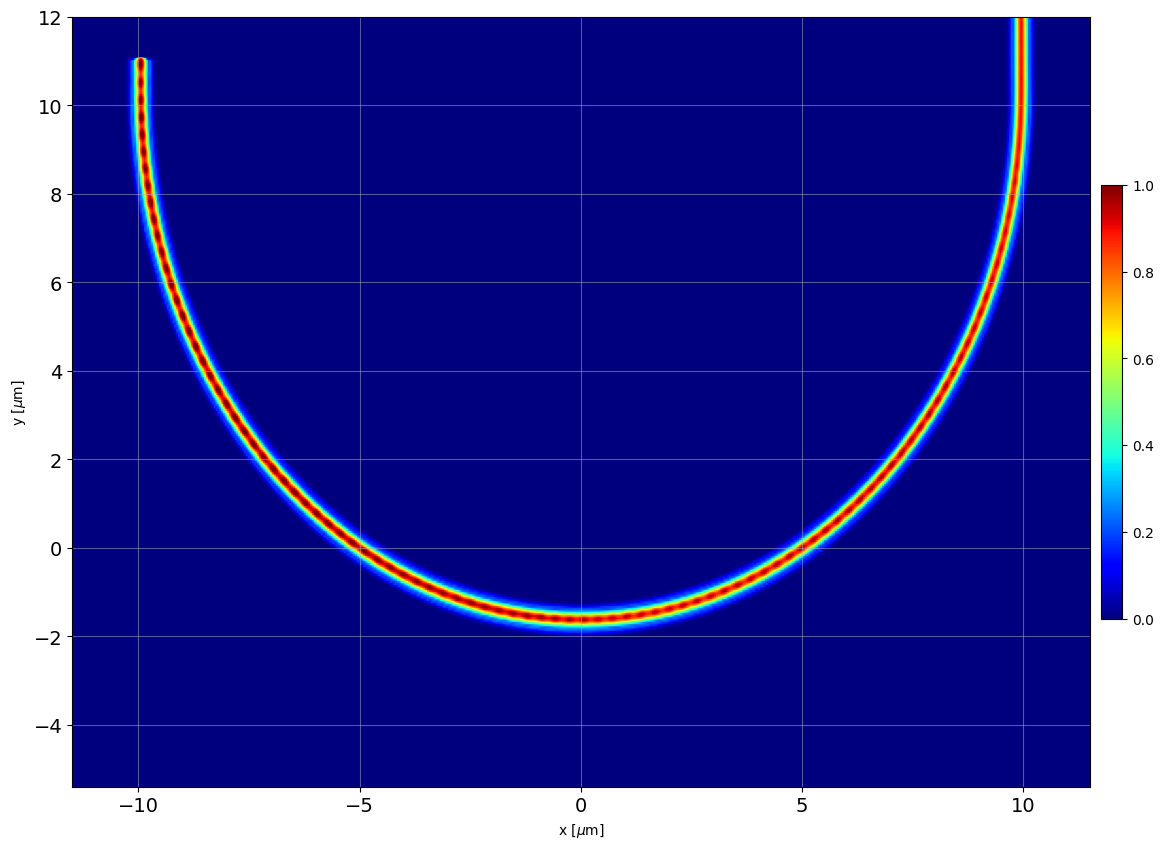

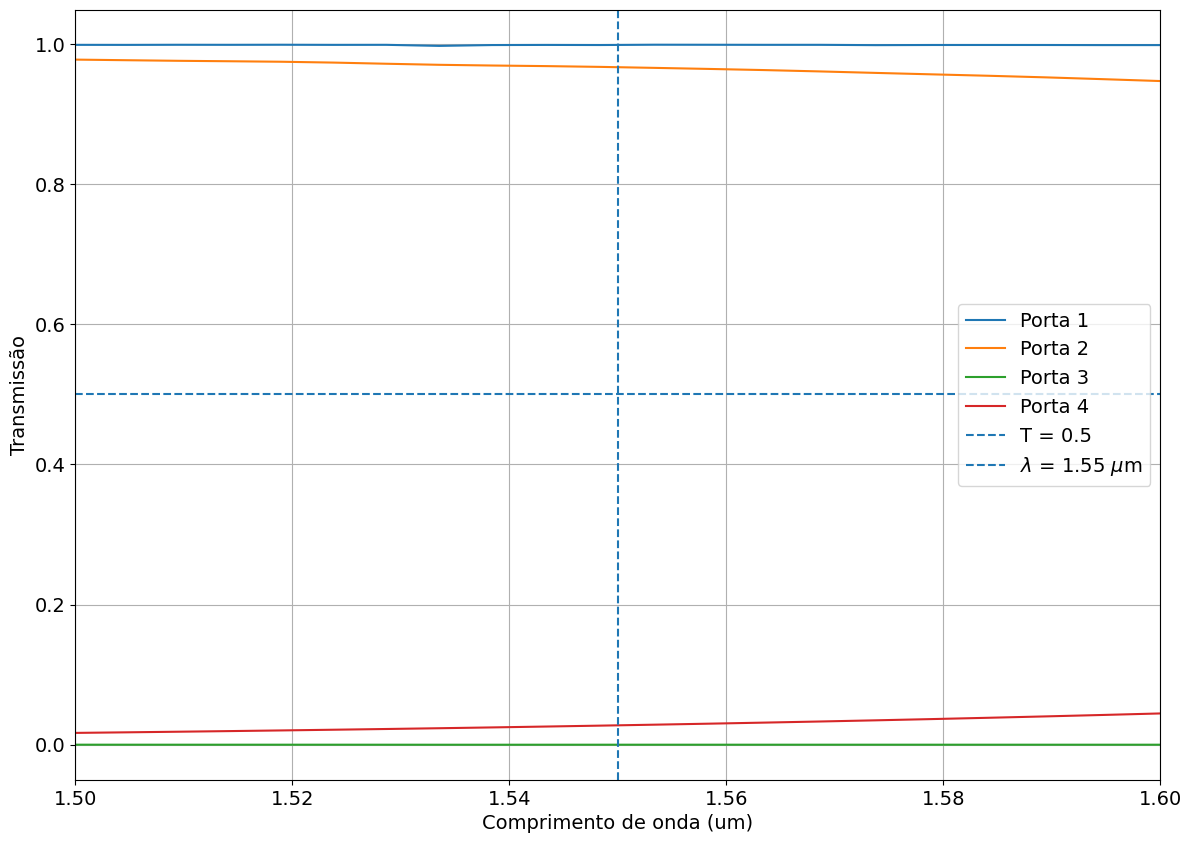

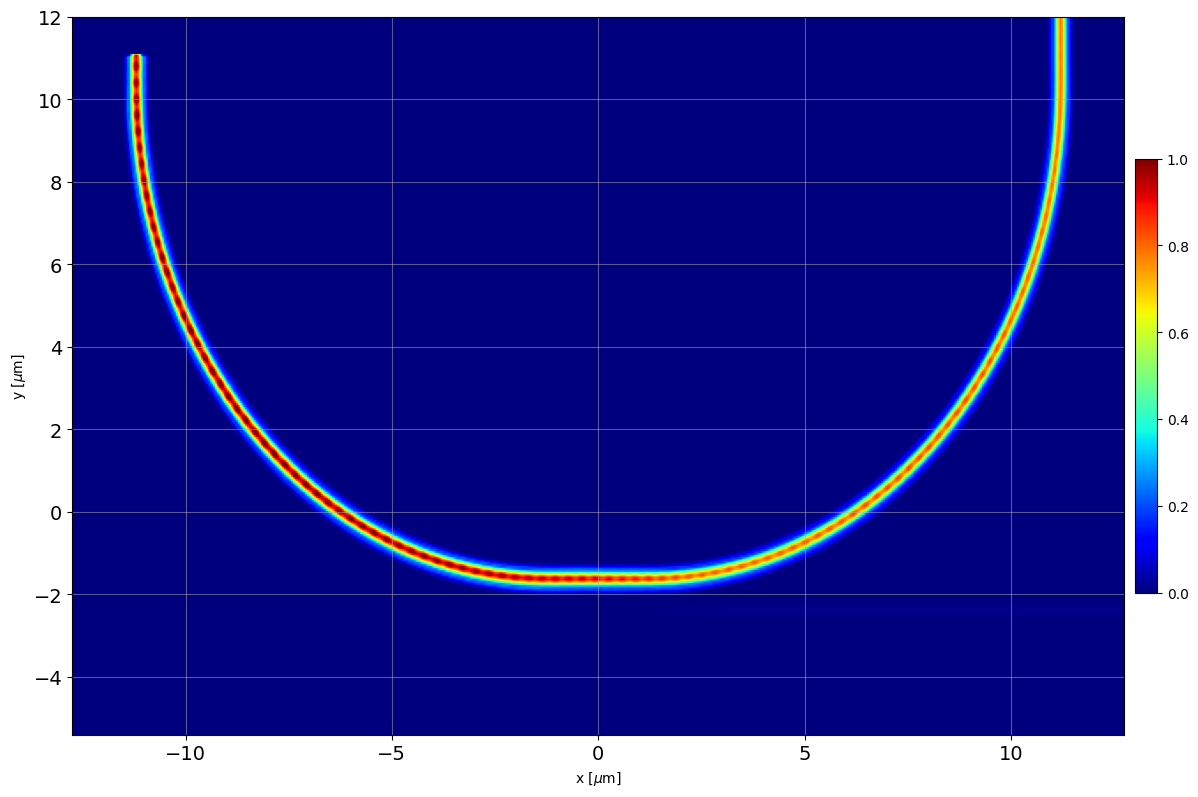

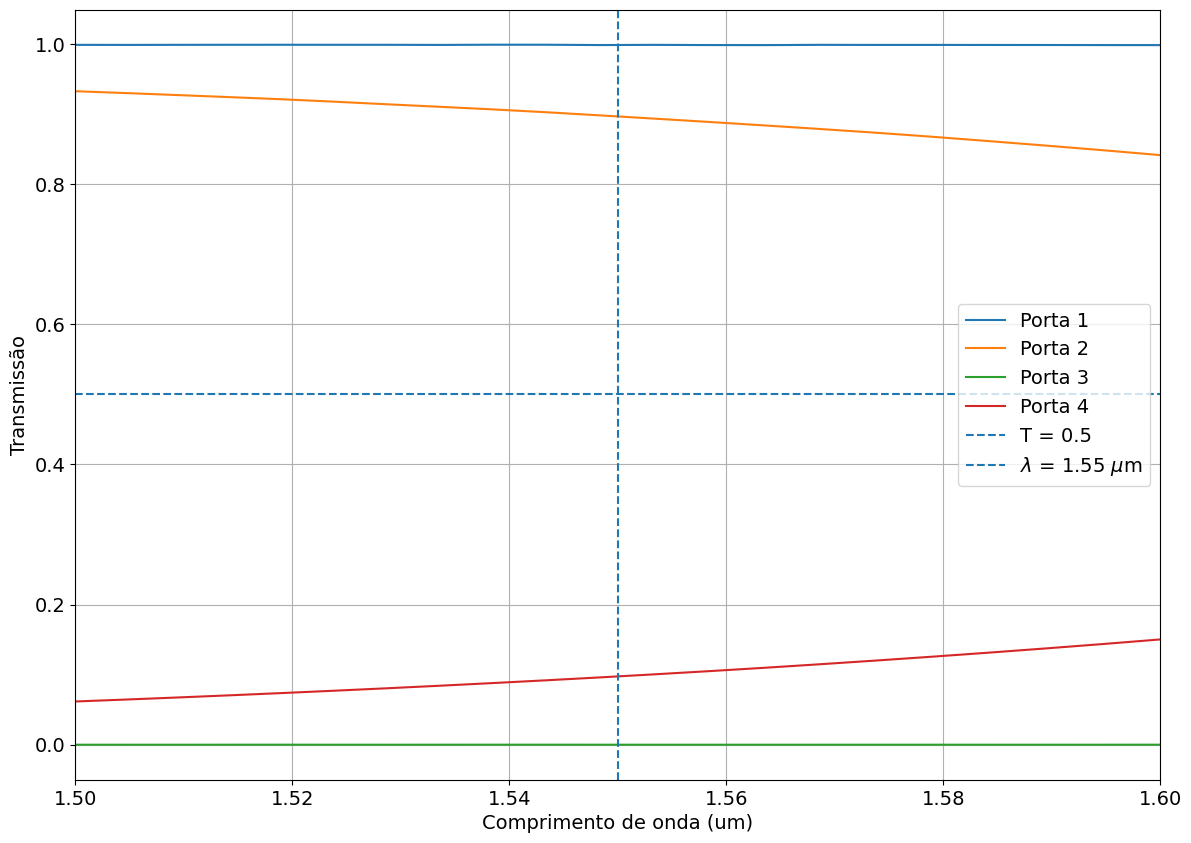

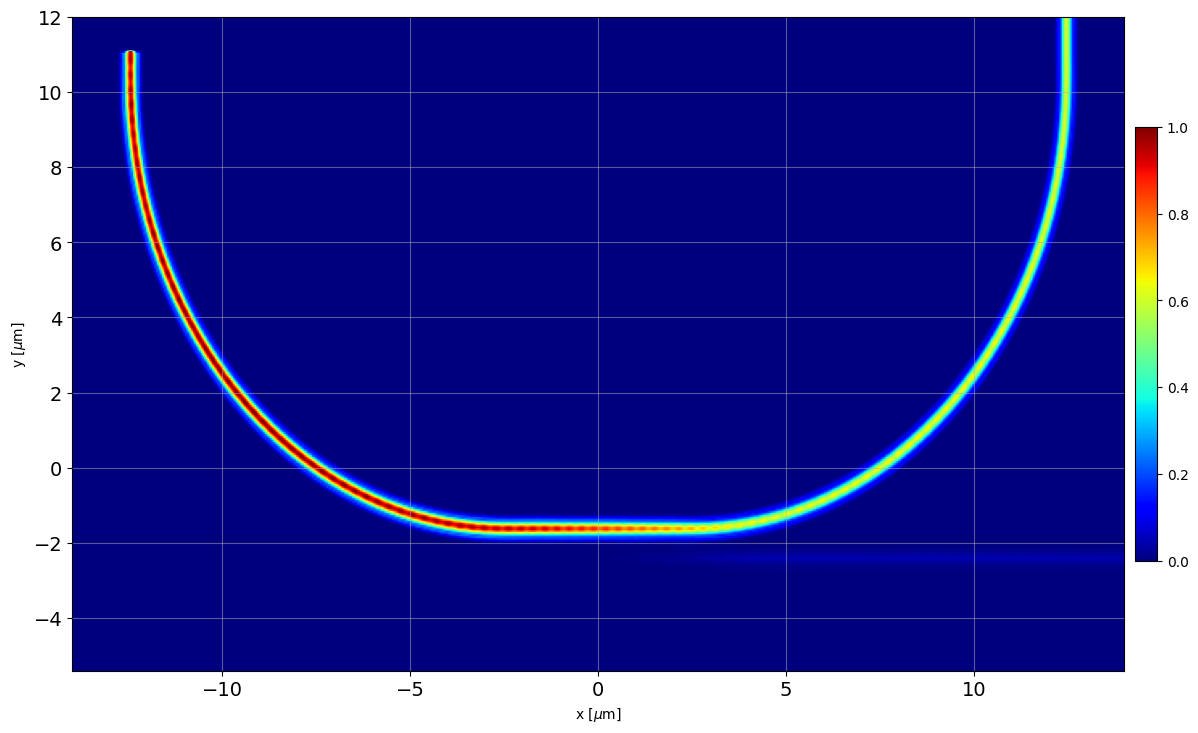

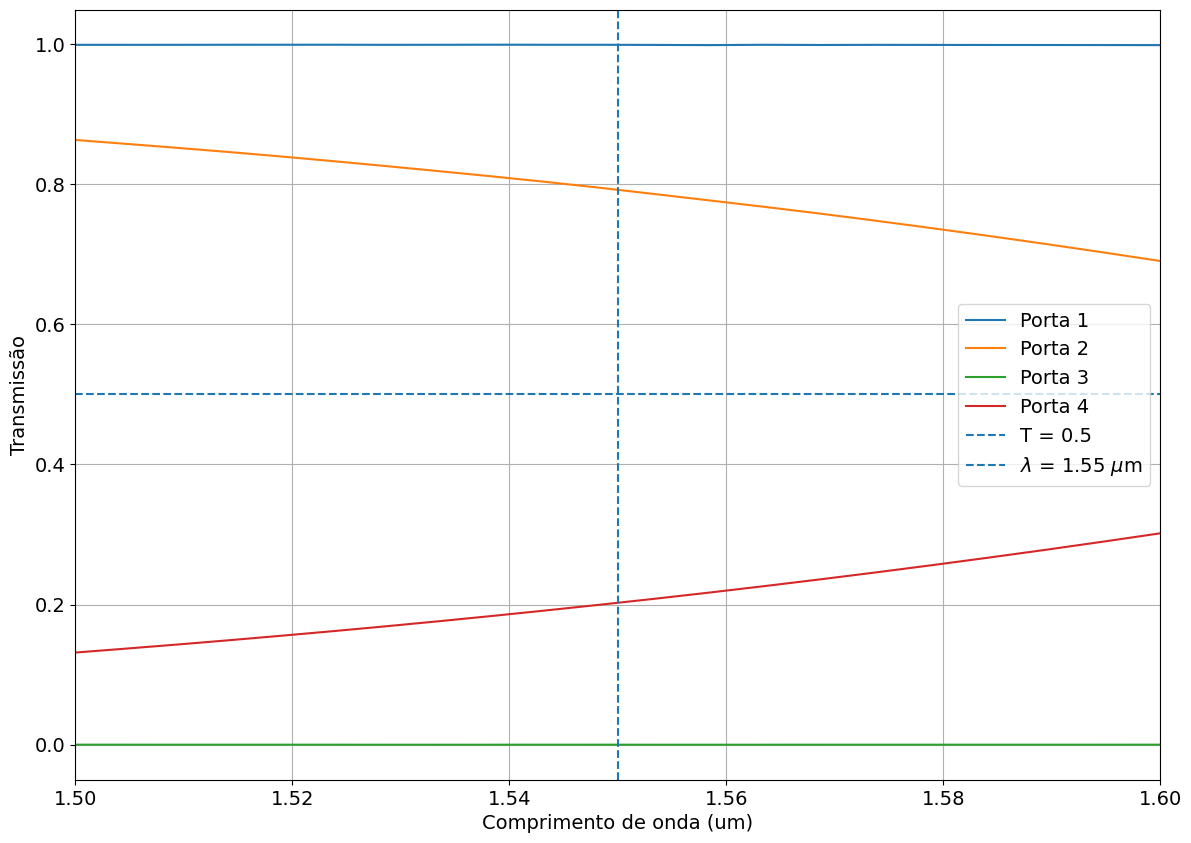

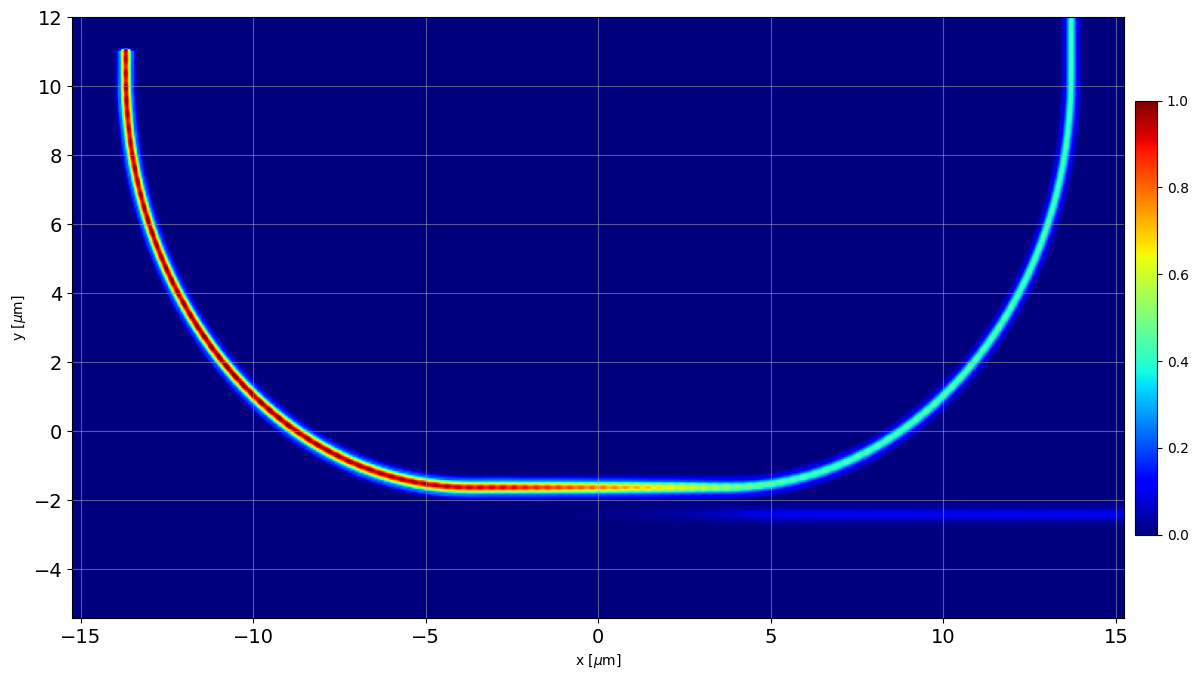

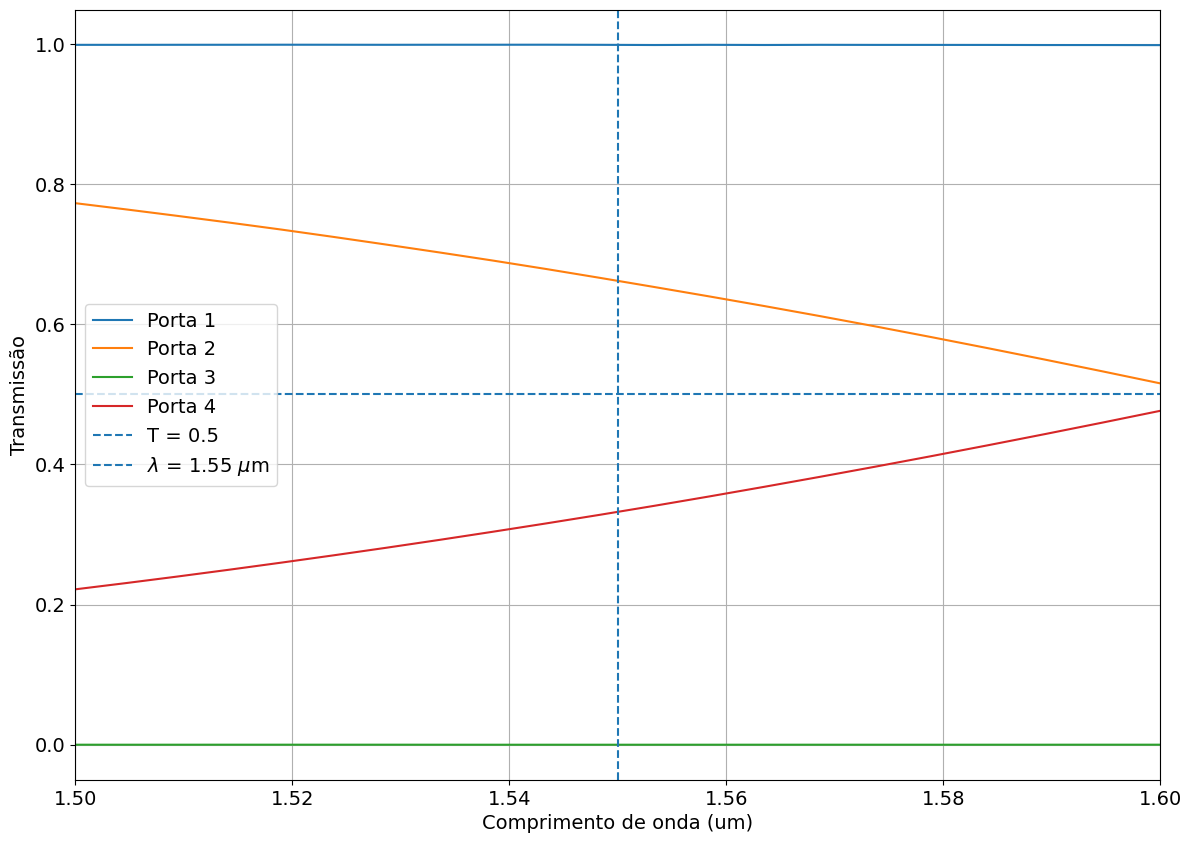

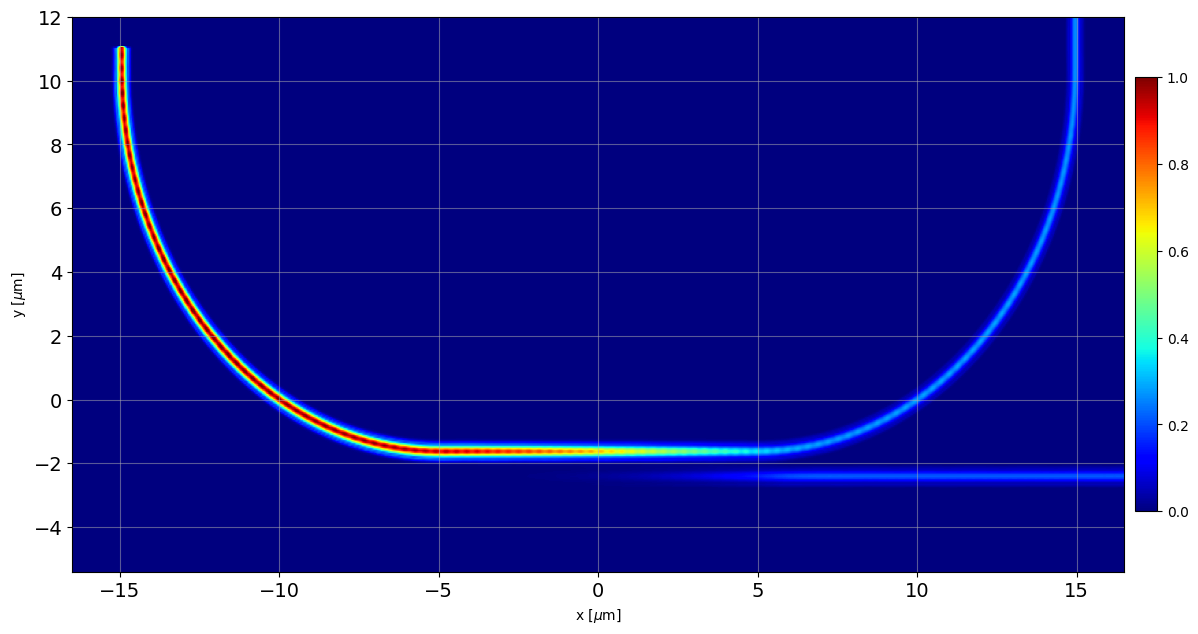

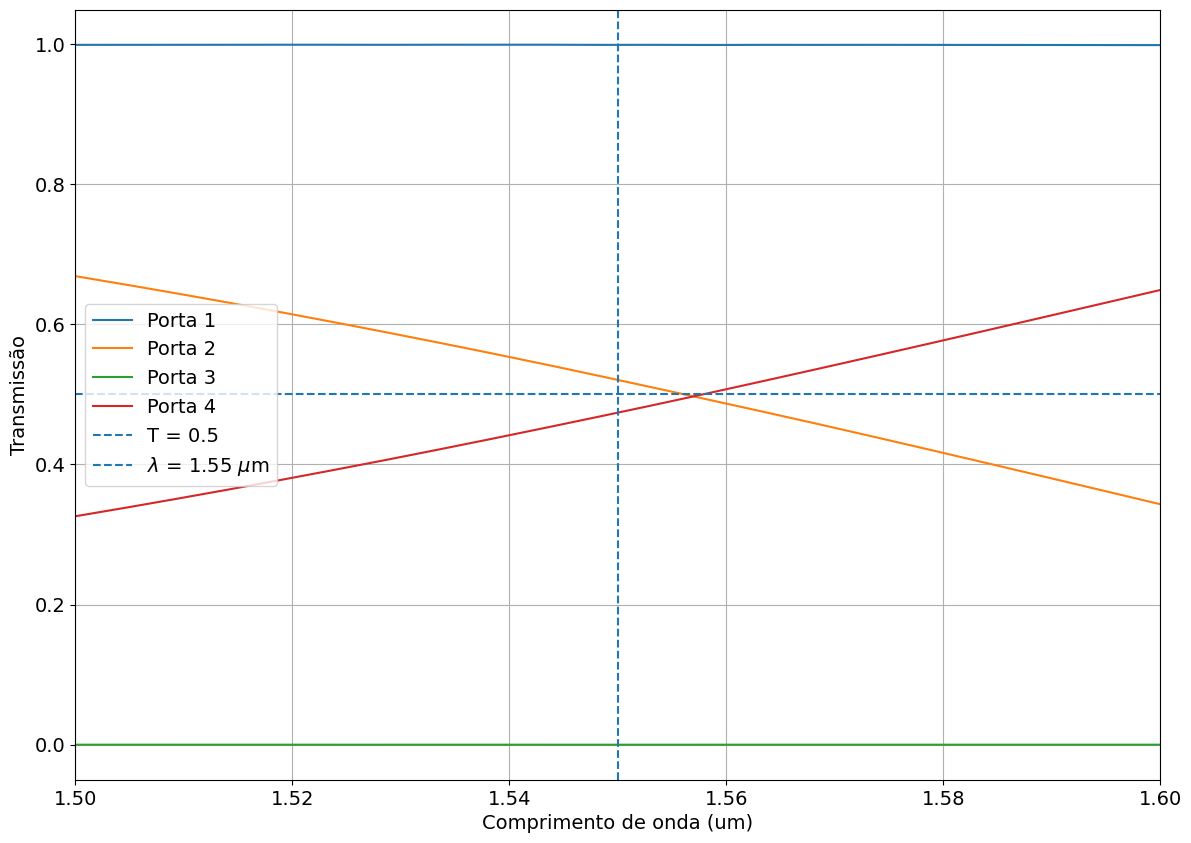

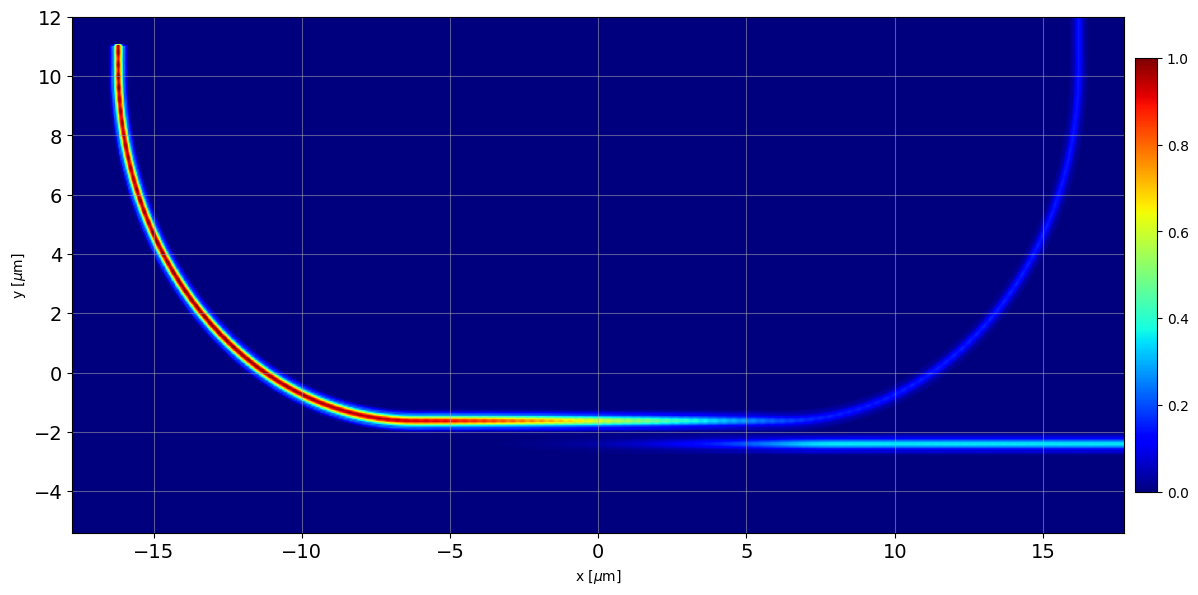

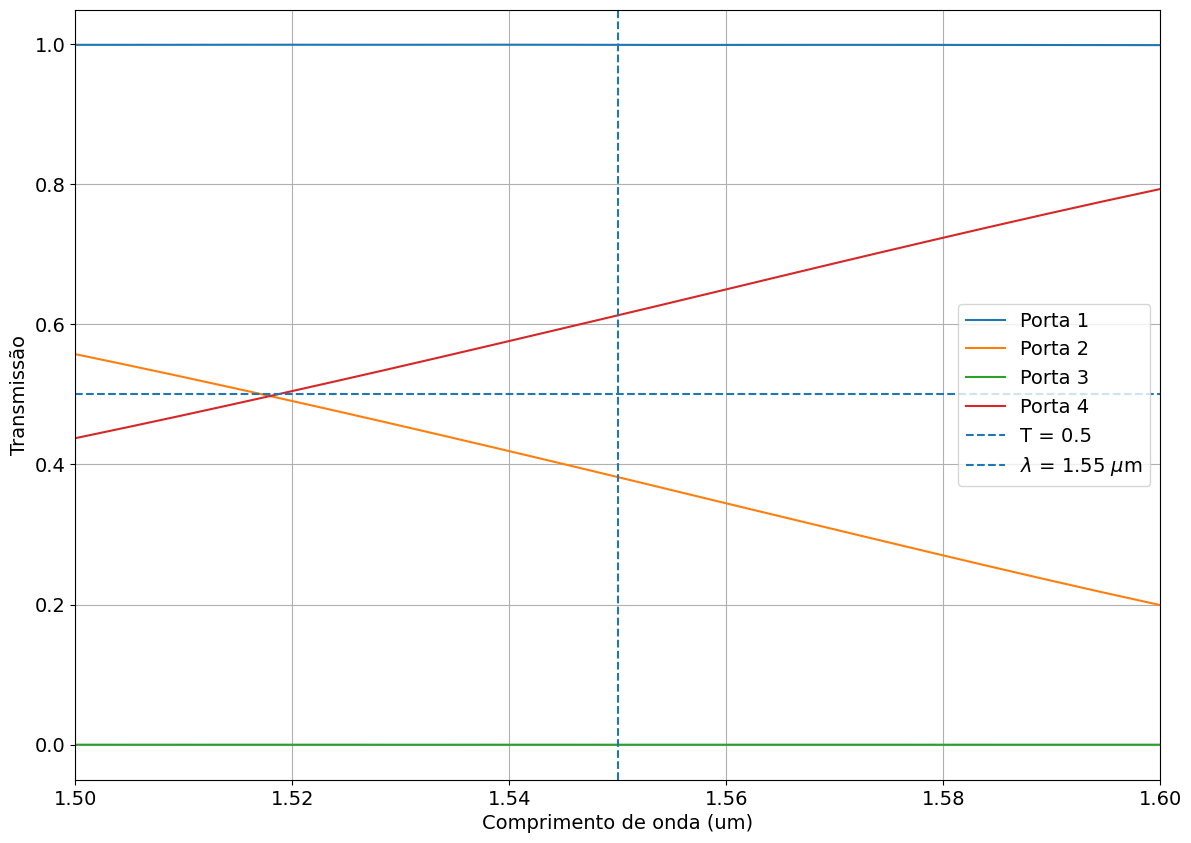

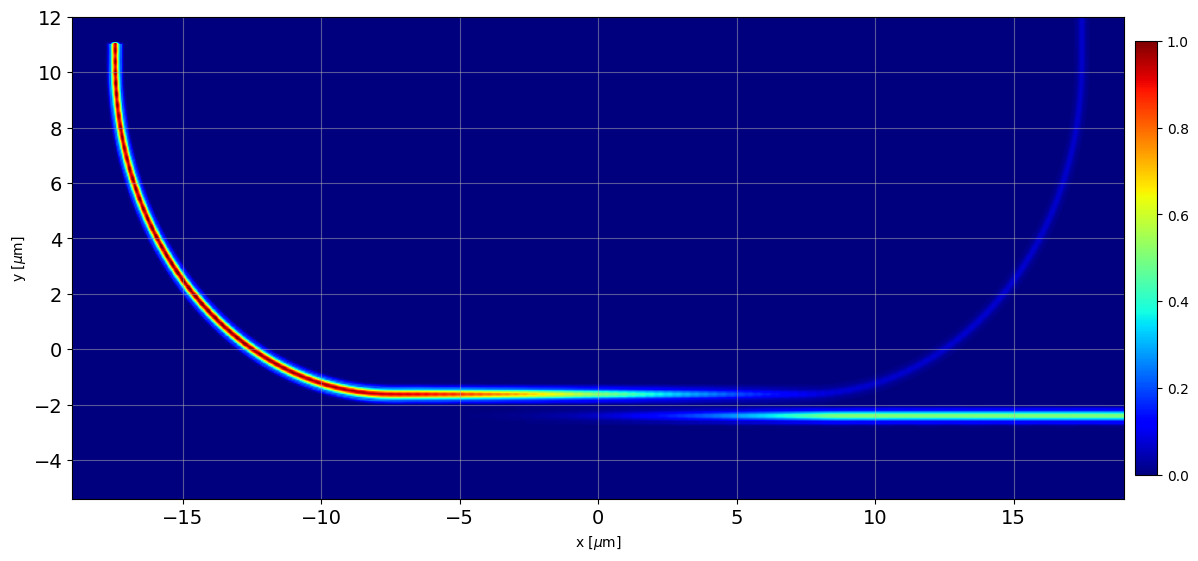

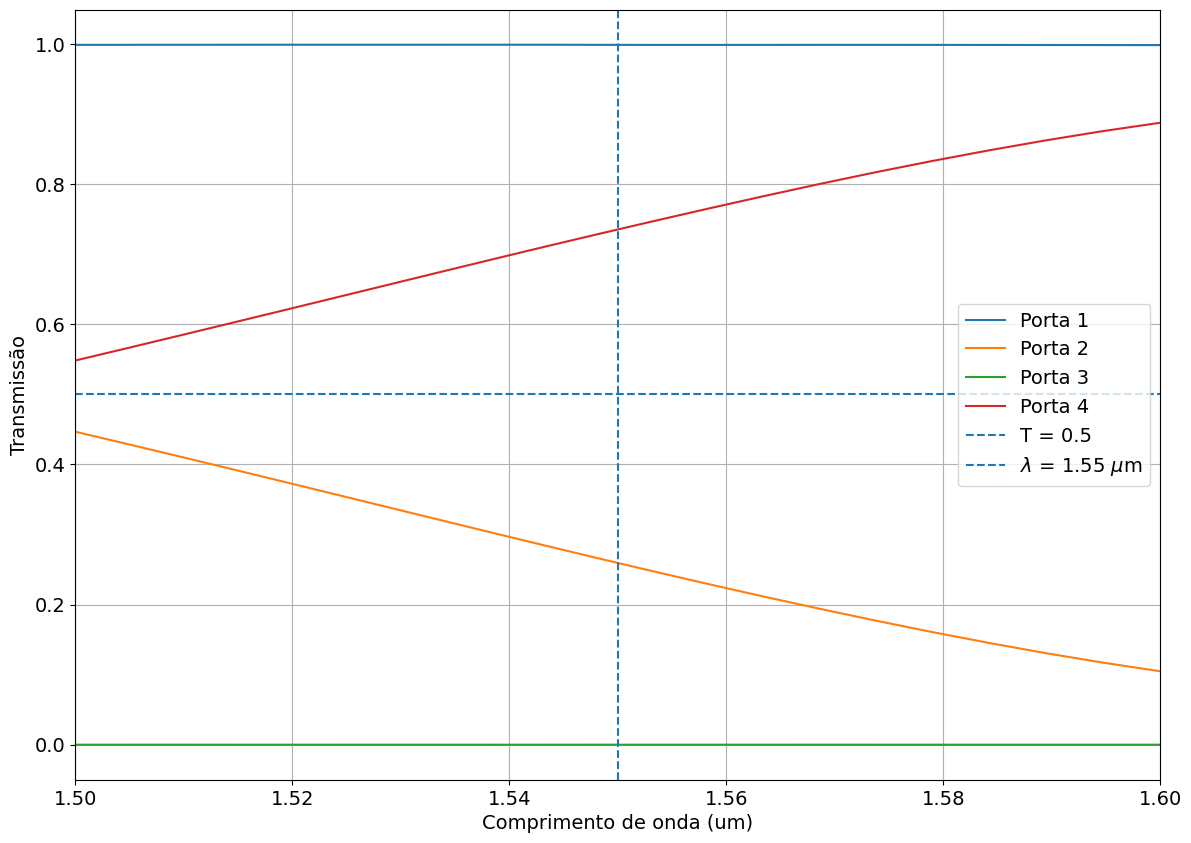

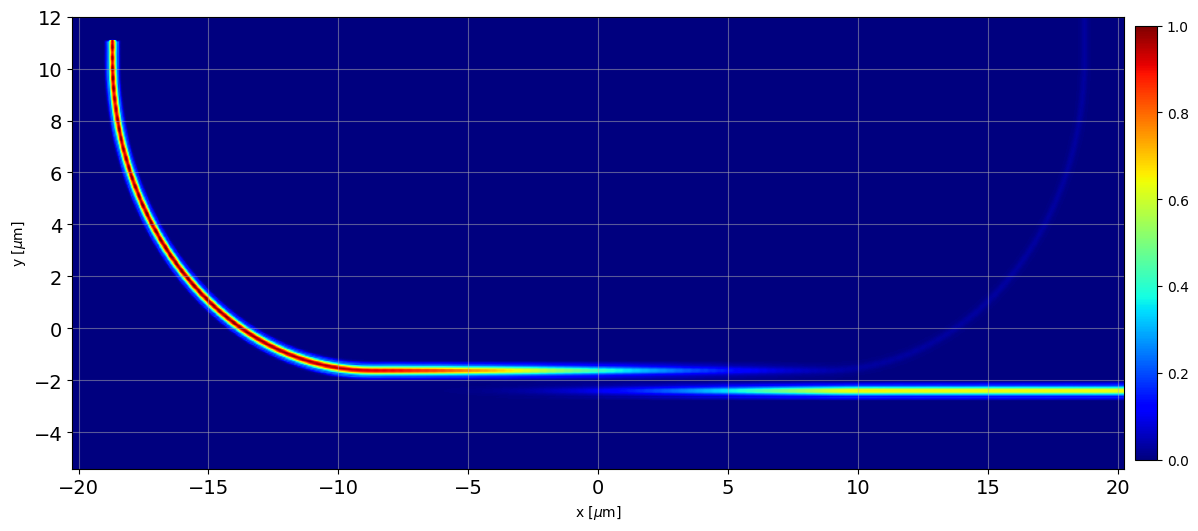

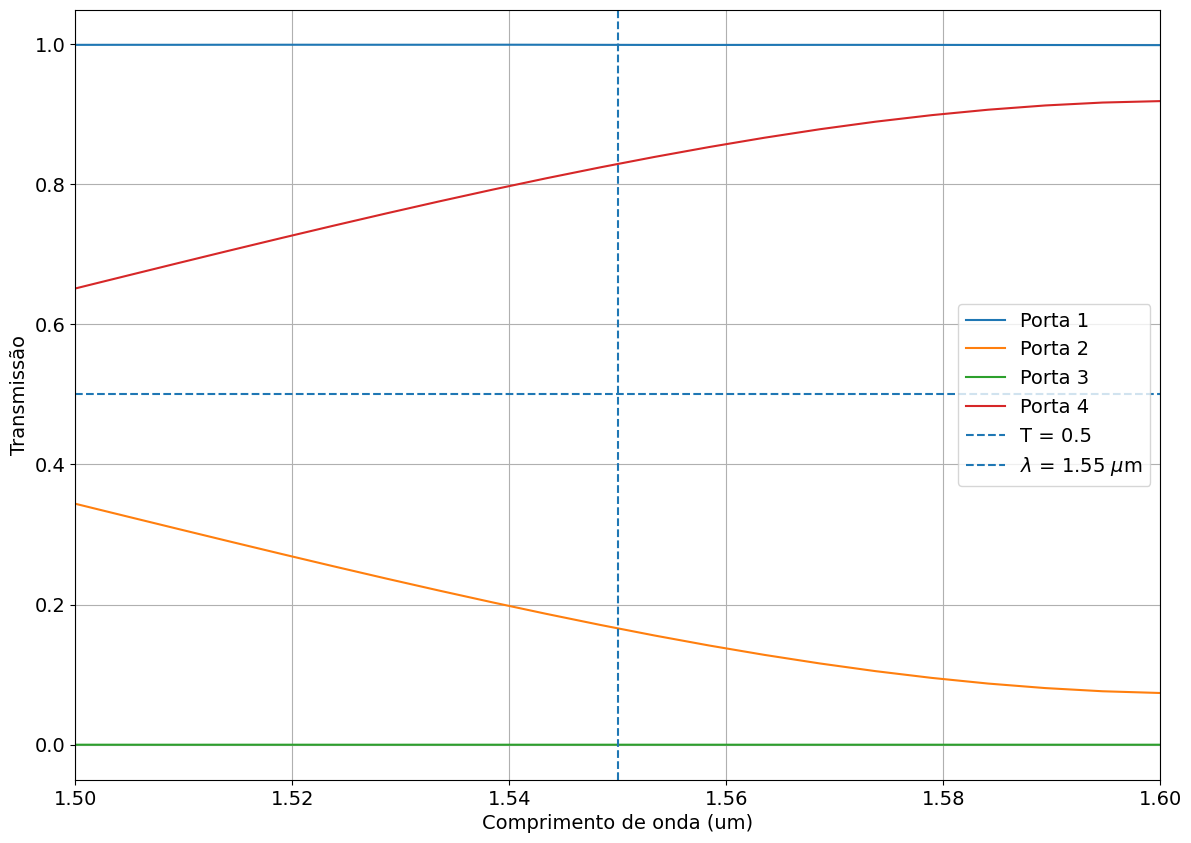

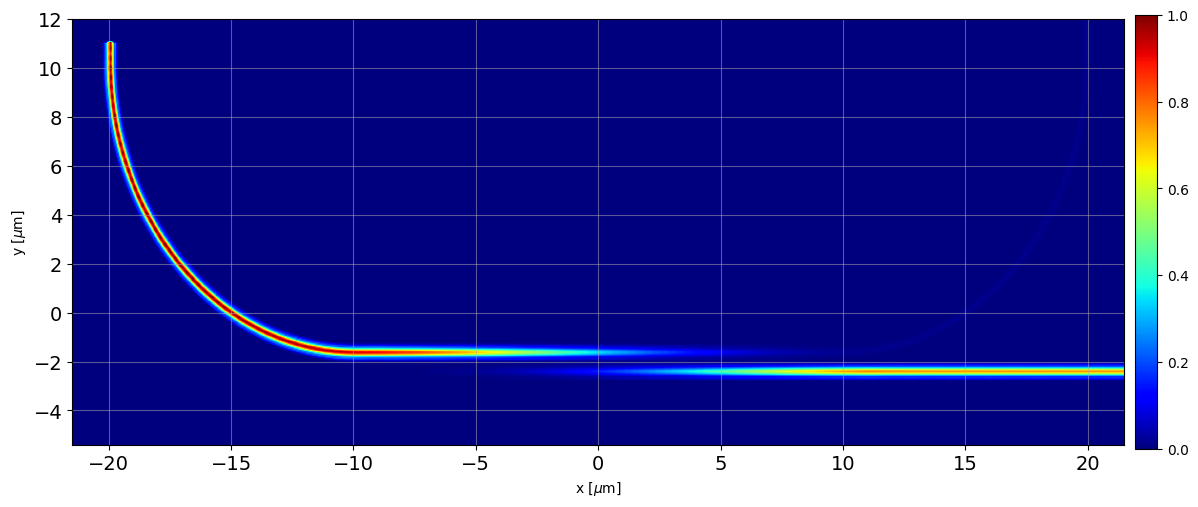

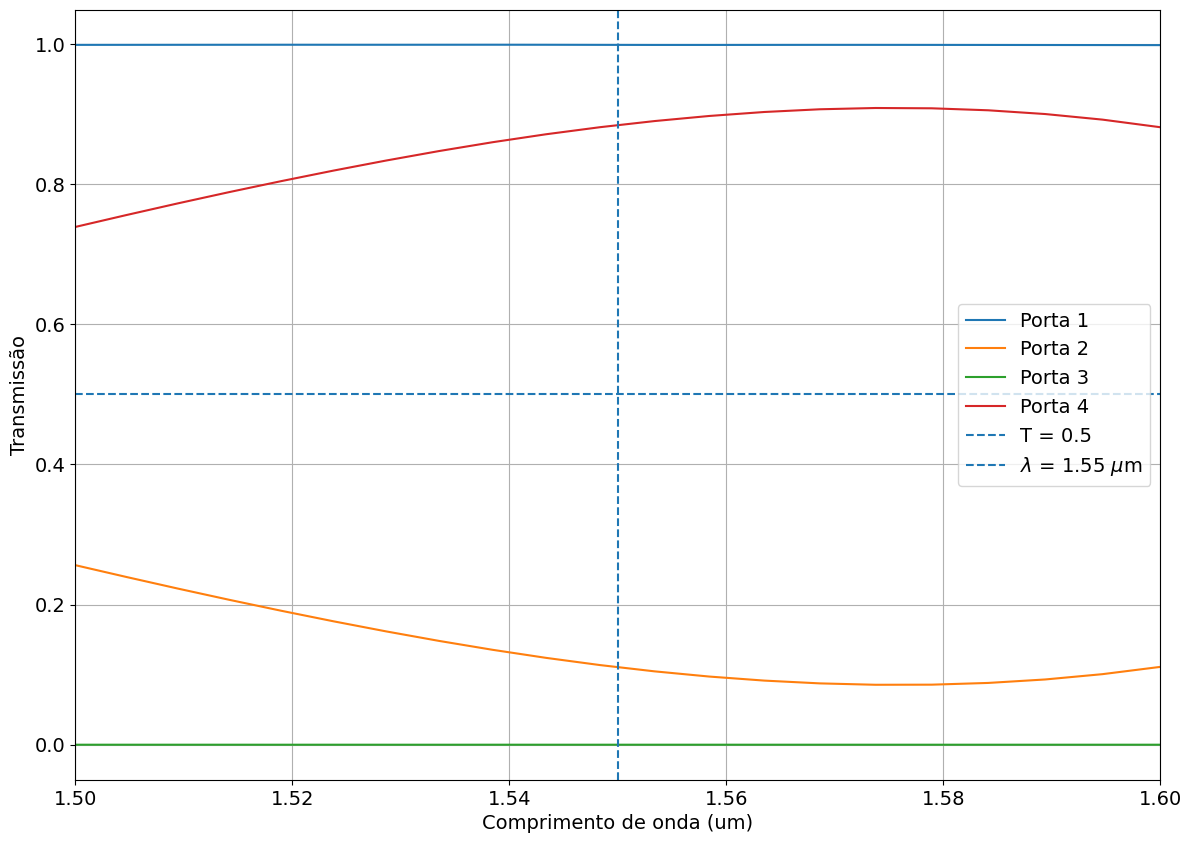

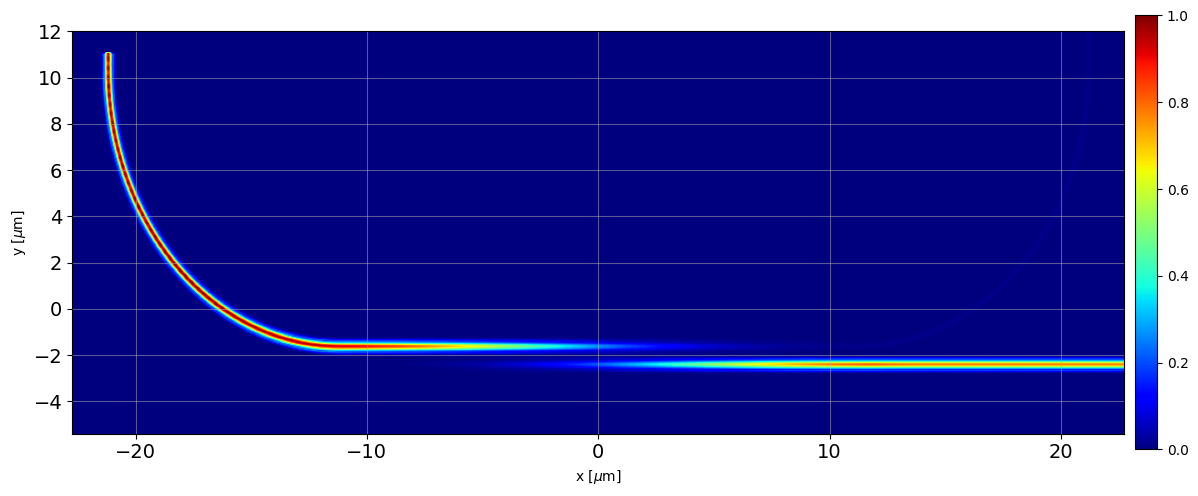

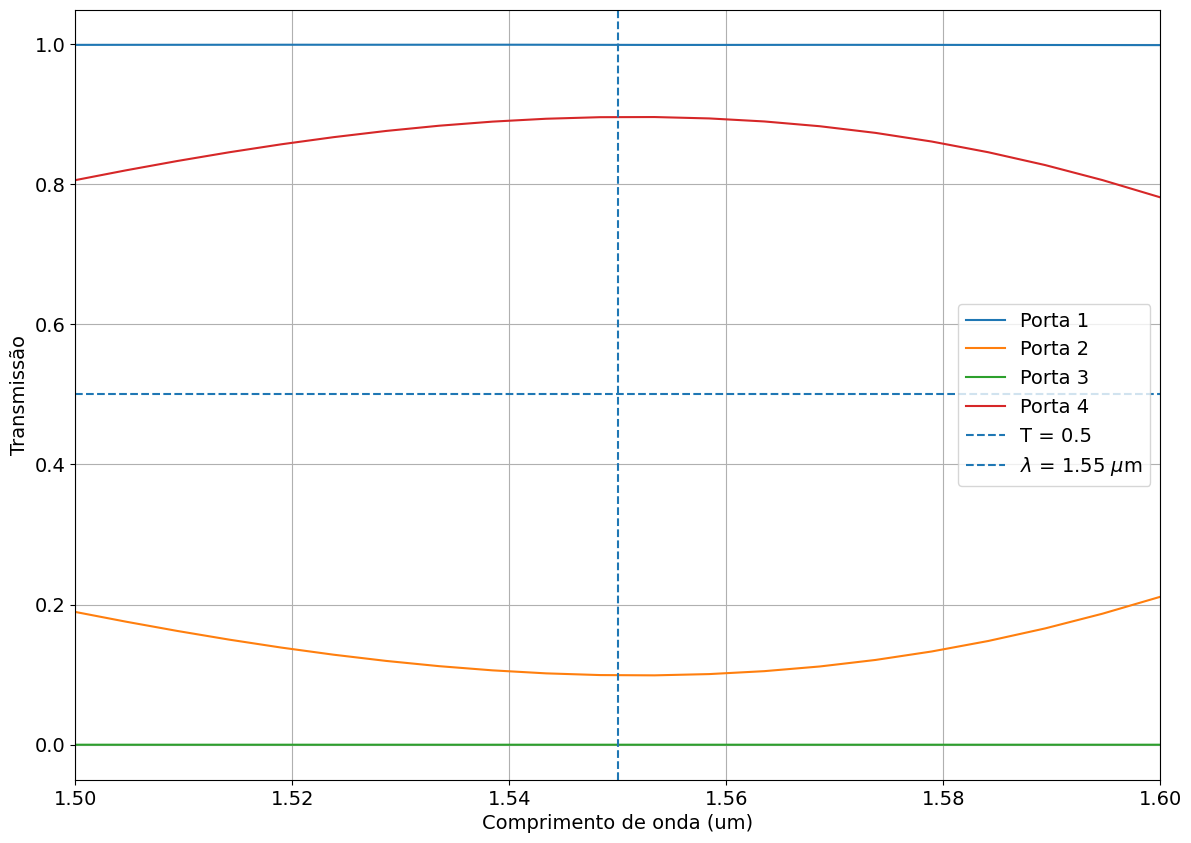

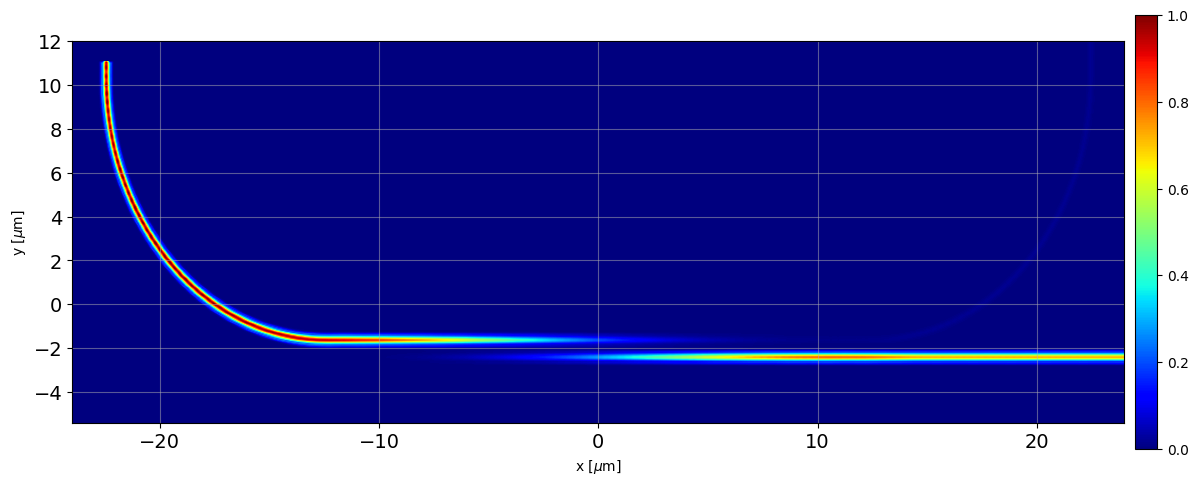

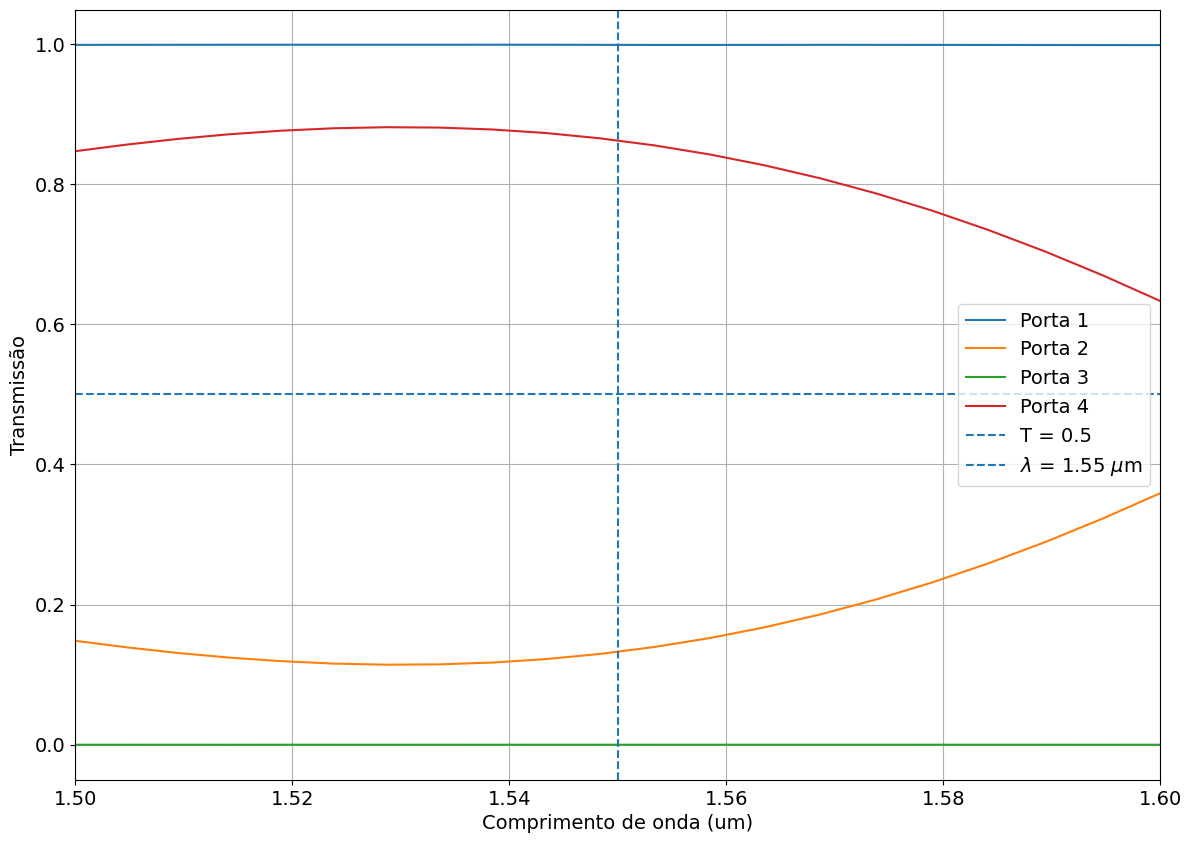

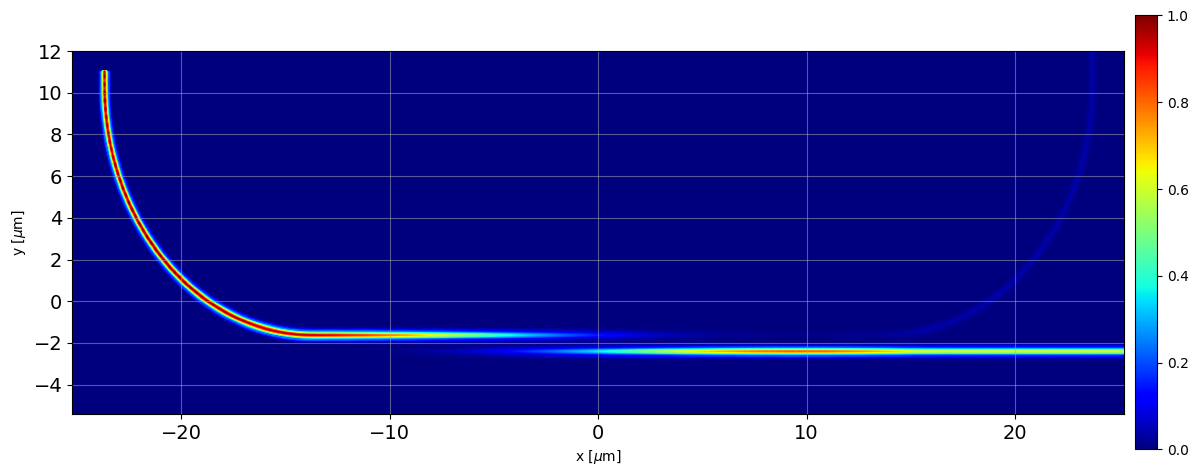

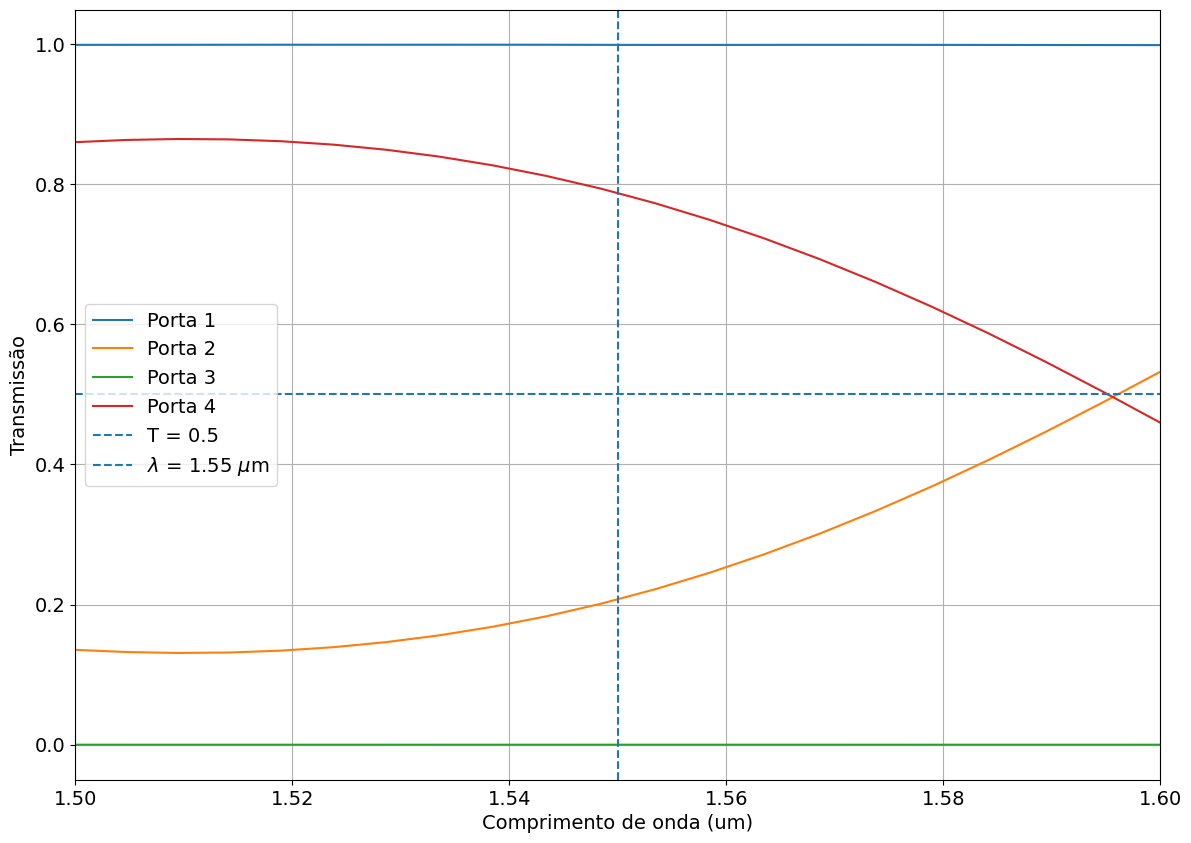

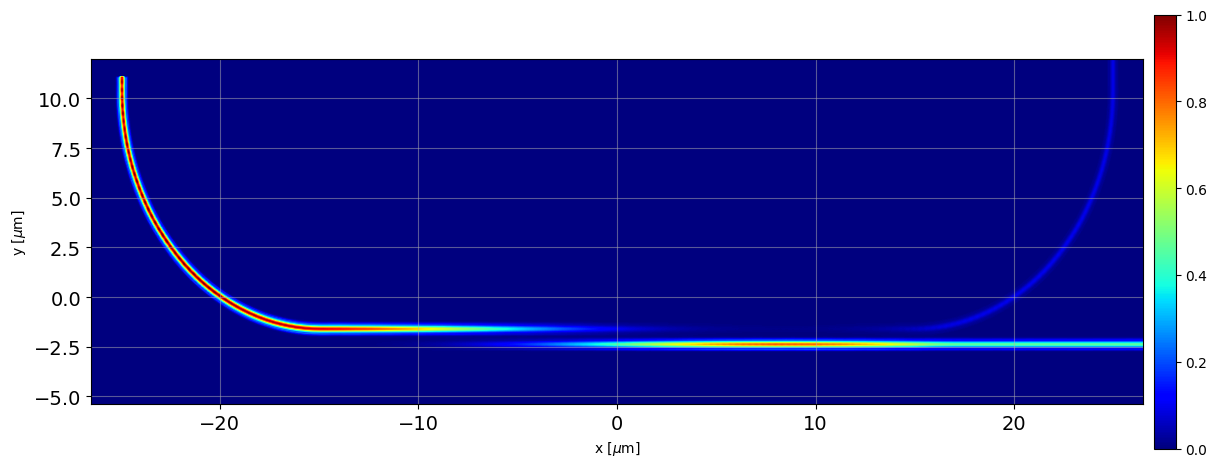

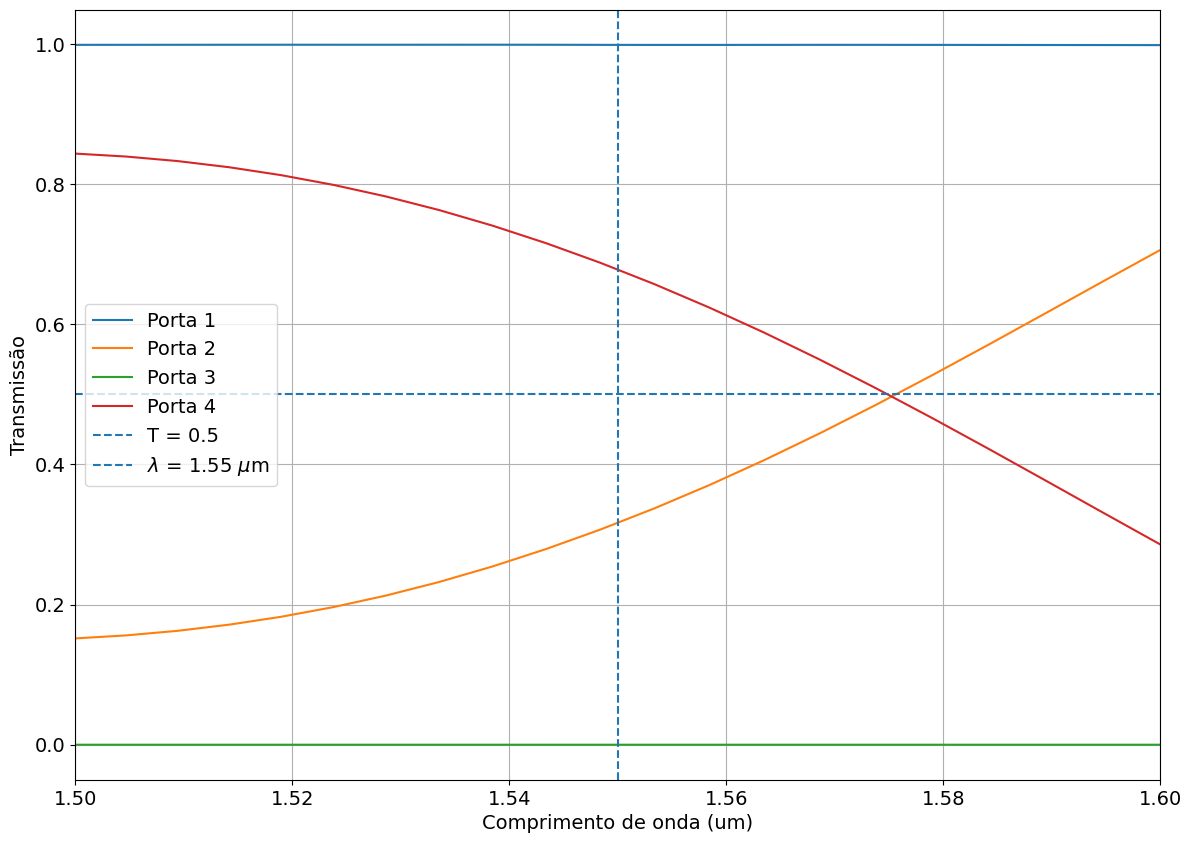

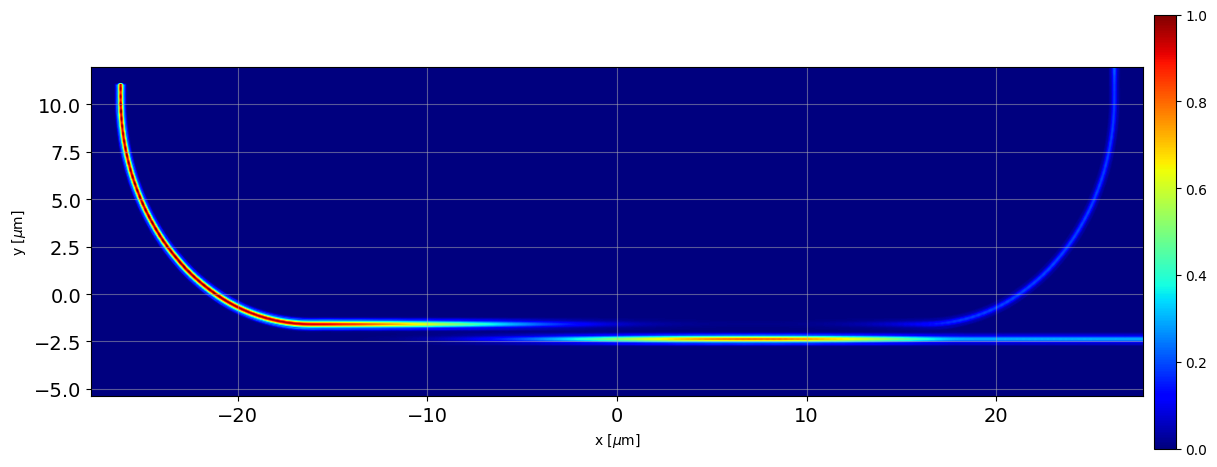

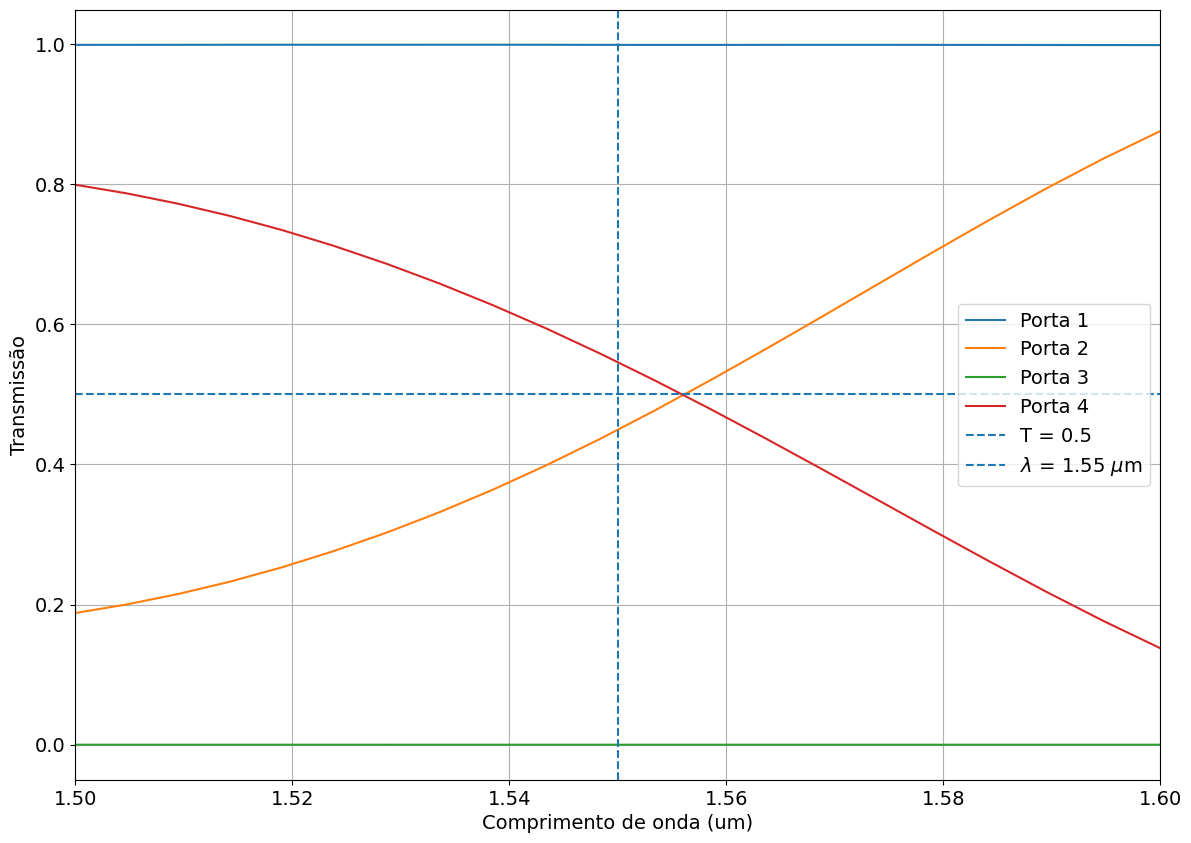

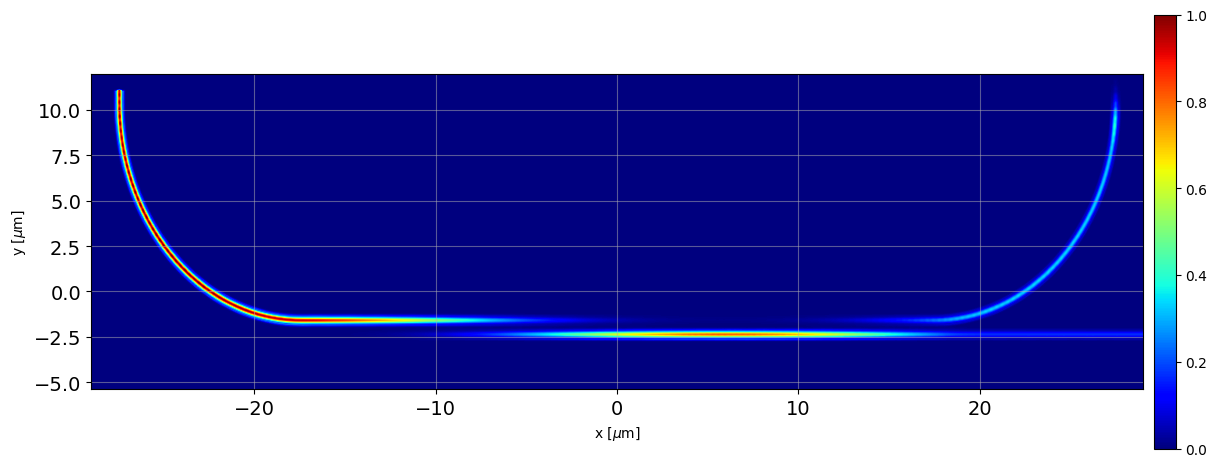

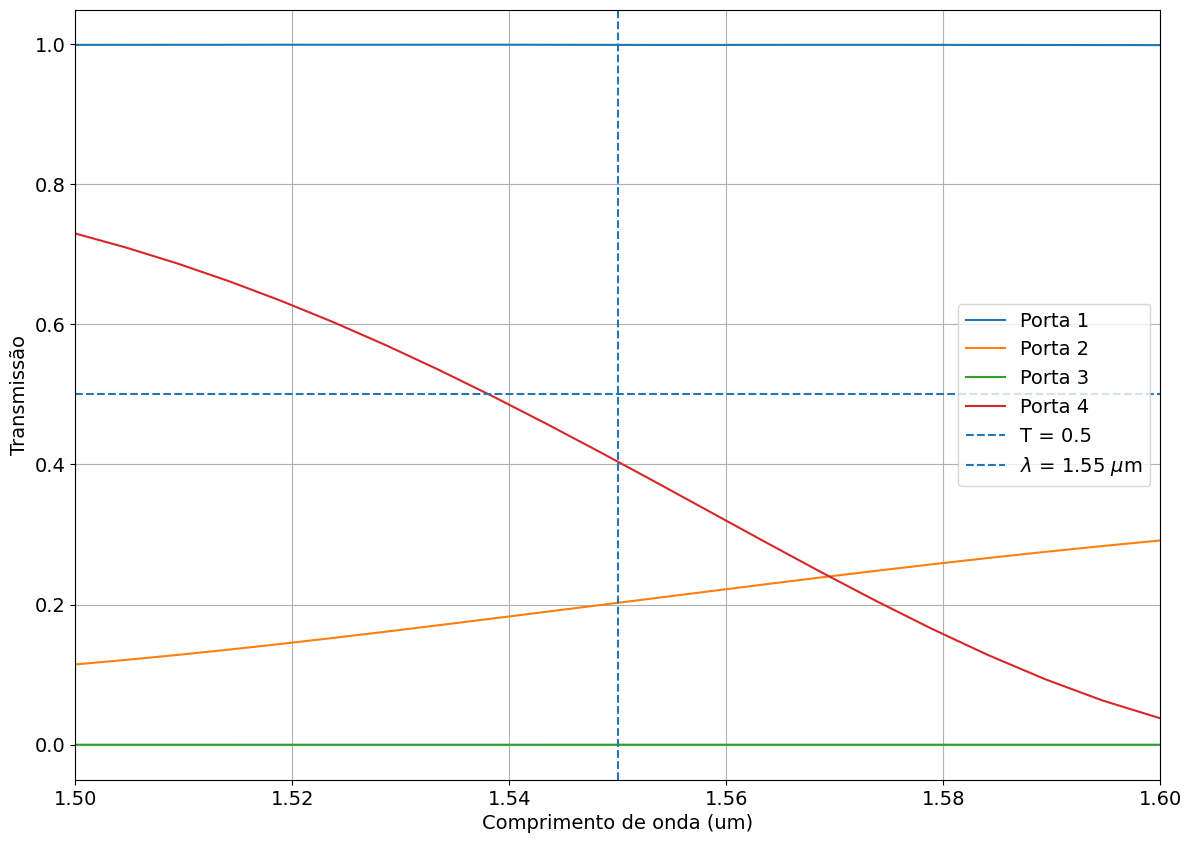

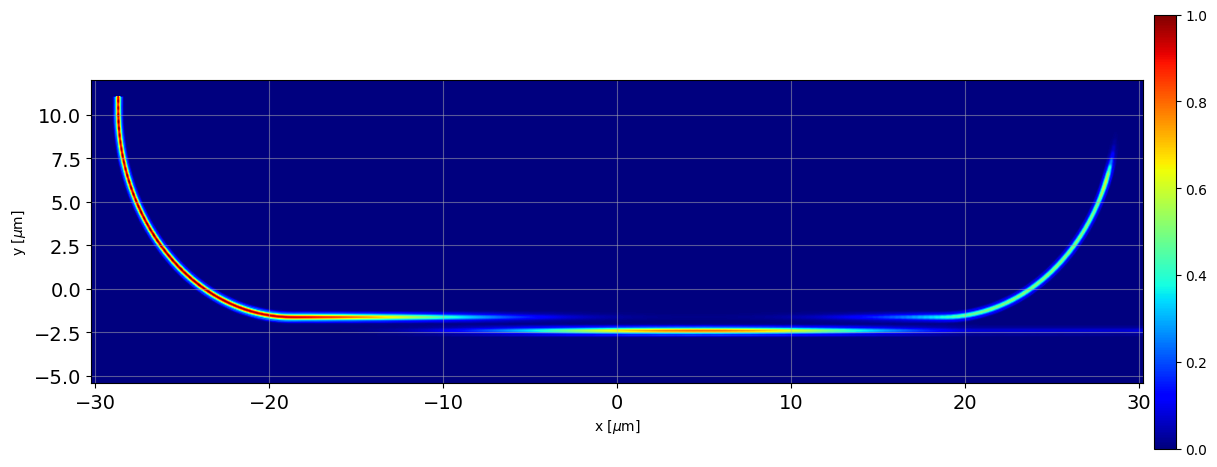

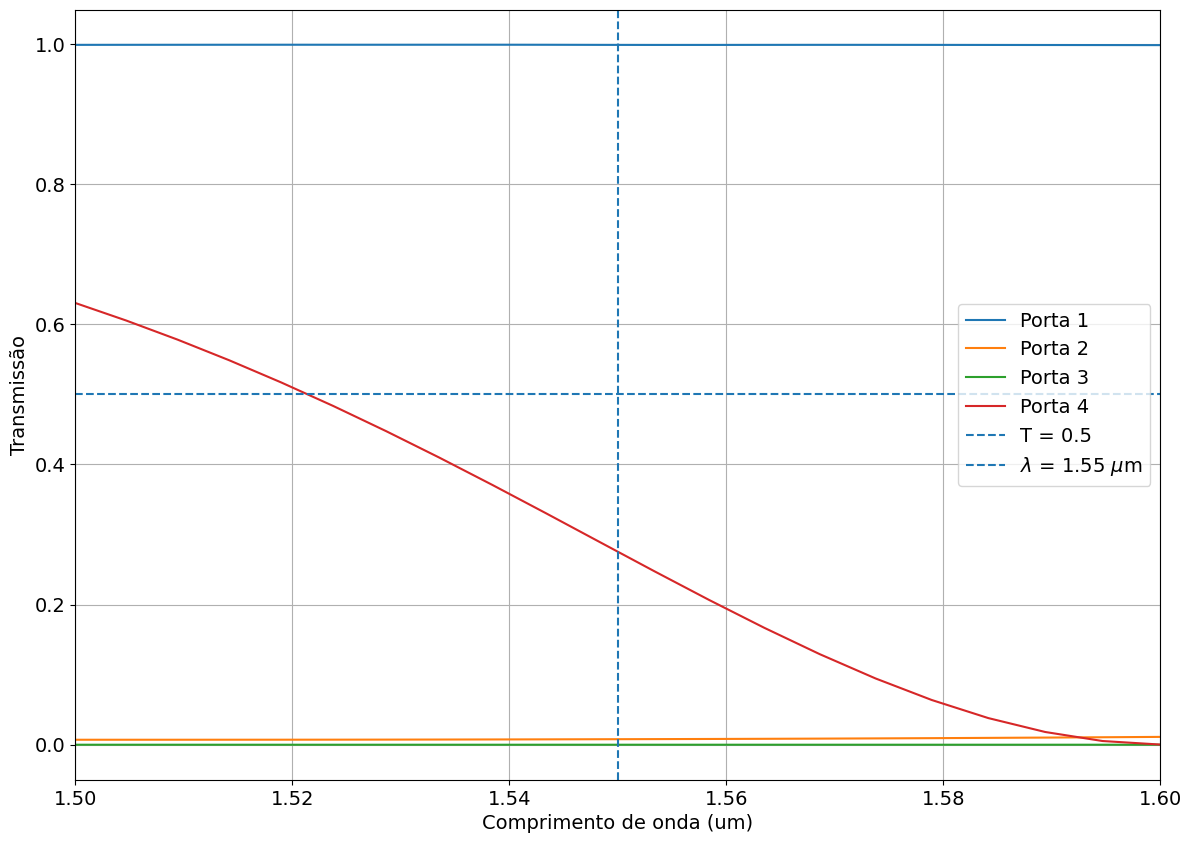

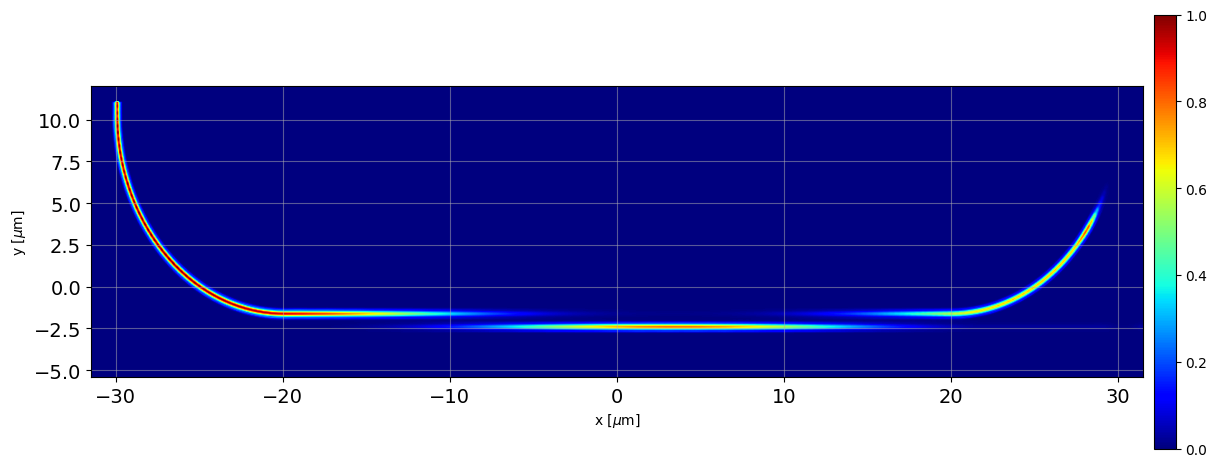

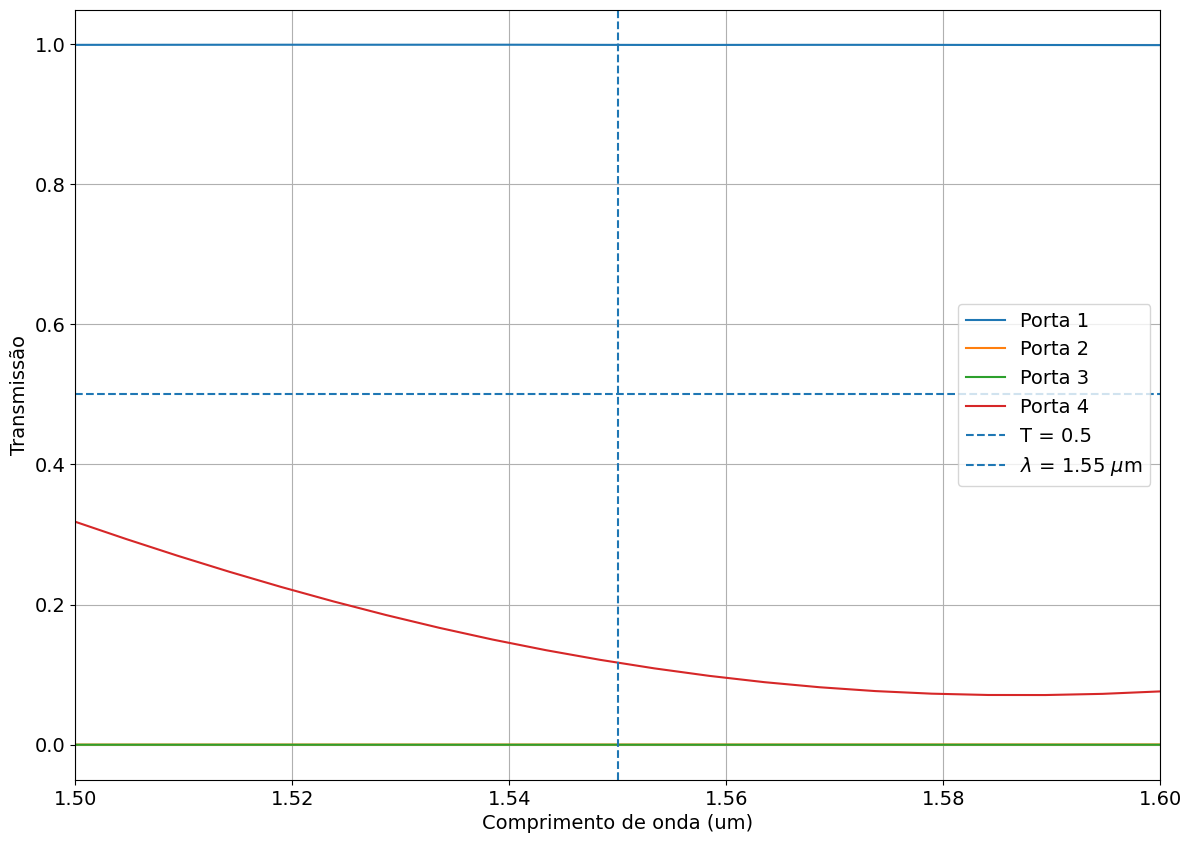

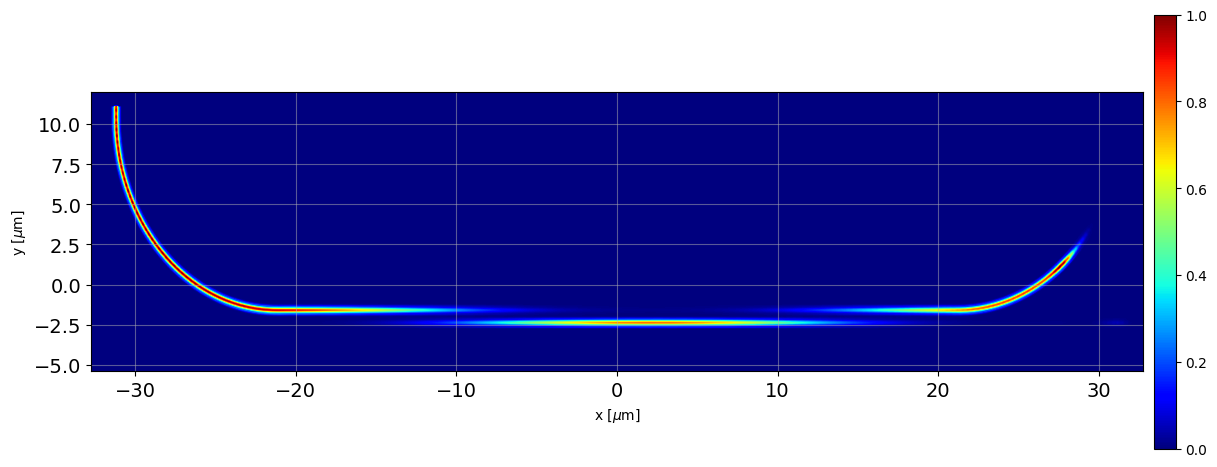

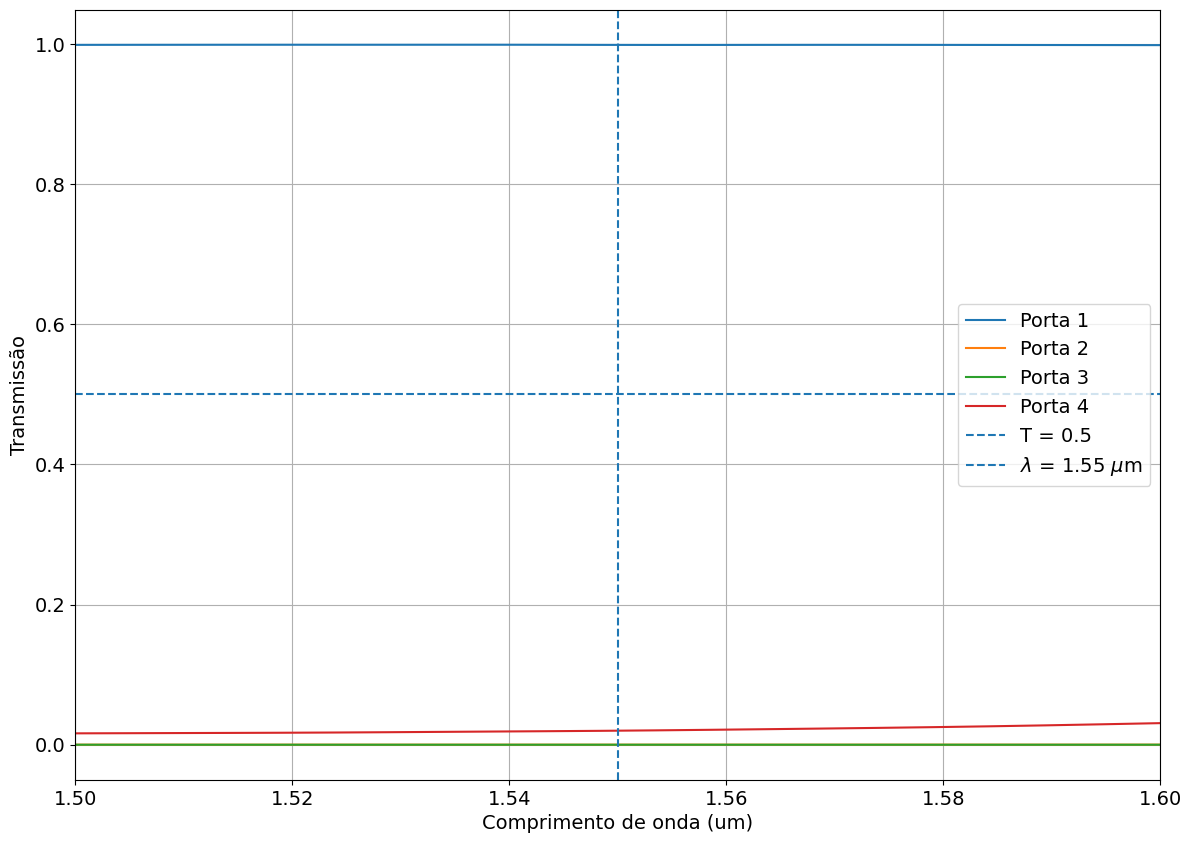

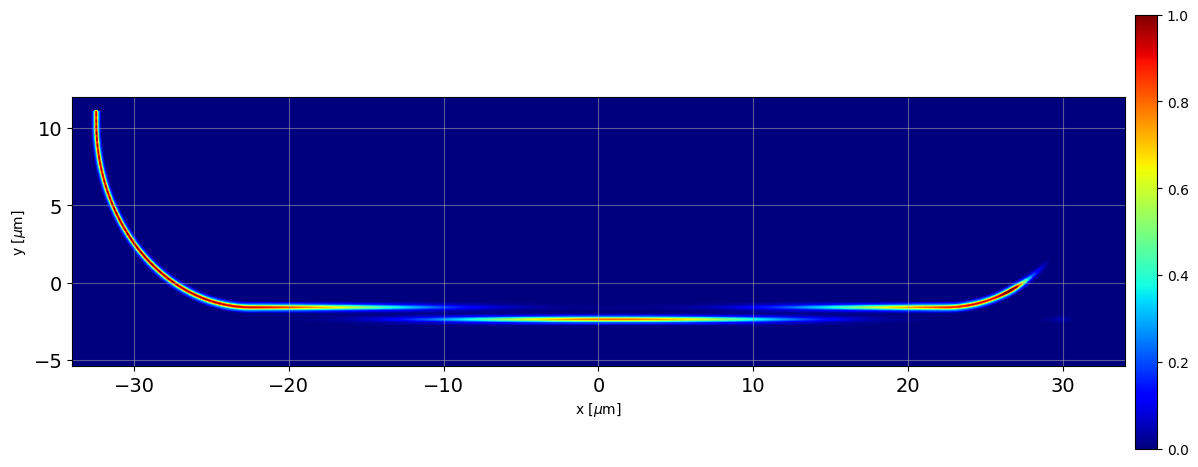

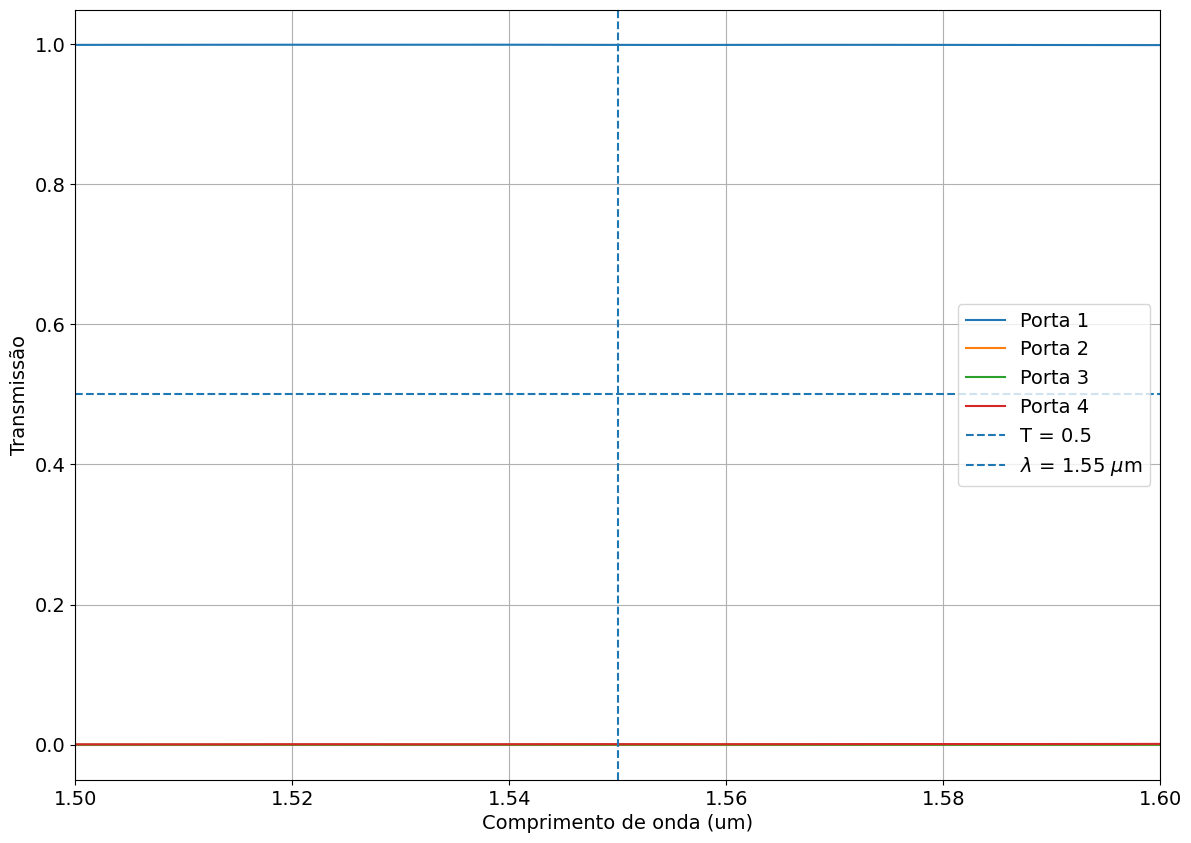

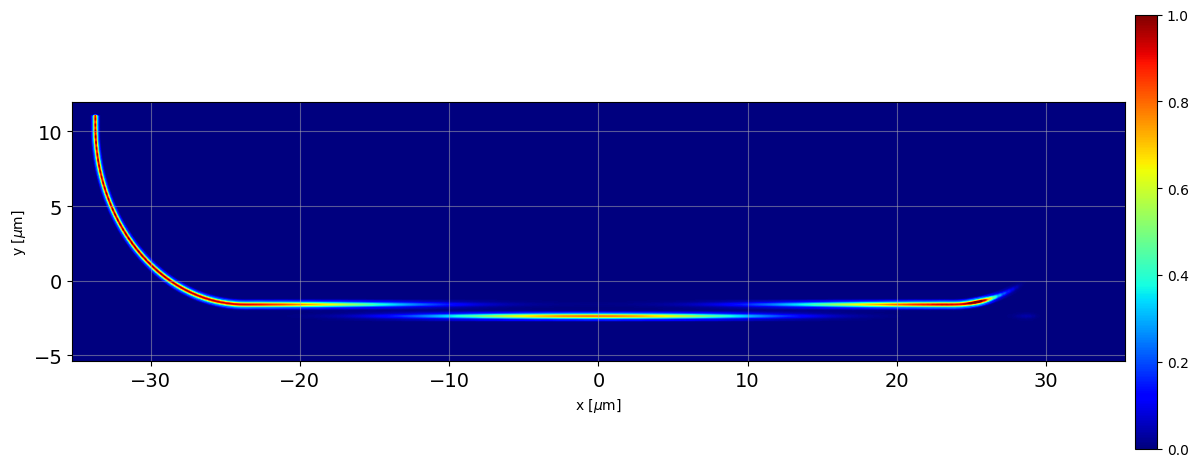

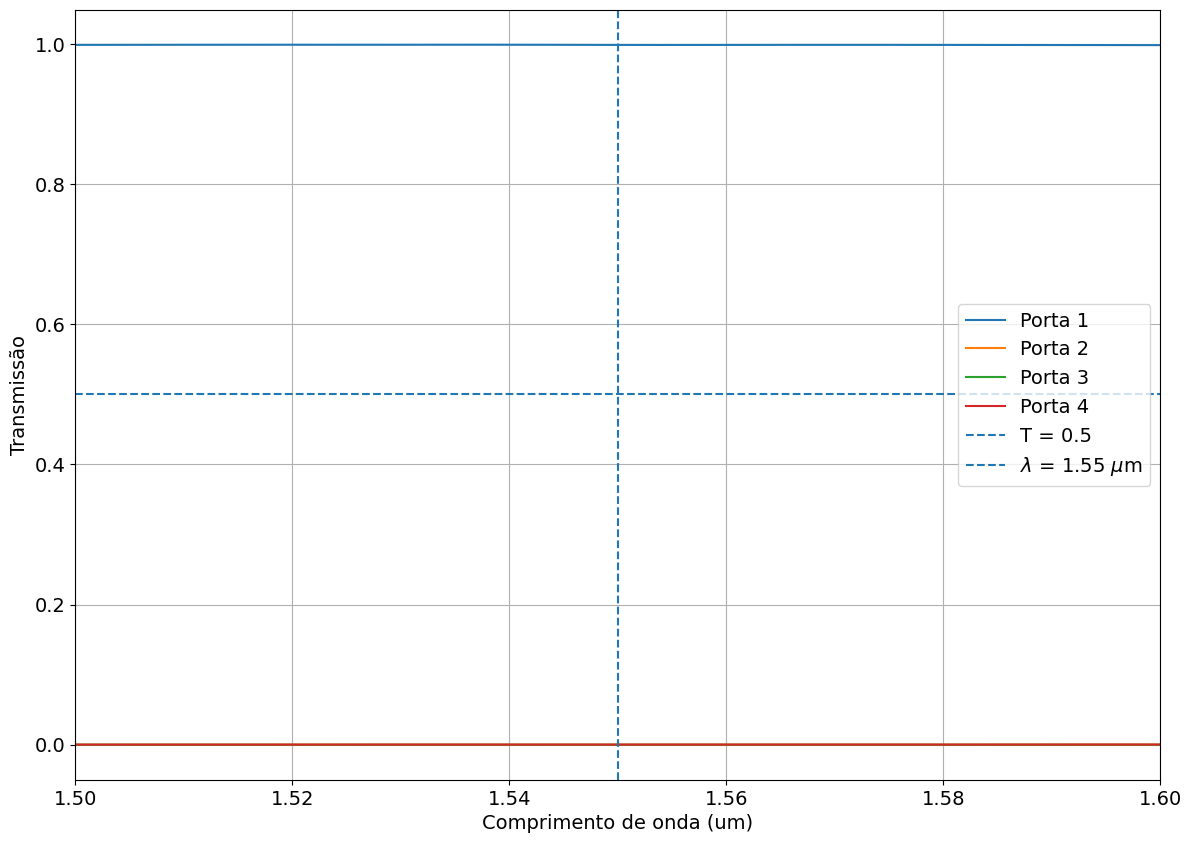

In [126]:

Transmission_1 = []
Transmission_2 = []
Transmission_3 = []
Transmission_4 = []

for i in range(len(L_x)):

    print(L_x[i])
        
    fdtdApi.switchtolayout()

    fdtdApi.deleteall()
    fdtdApi.addrect()
    fdtdApi.set('name', 'core_1')
    fdtdApi.set('material', core_material)
    fdtdApi.set("x", x_core)
    fdtdApi.set("x span", L_x[i])
    fdtdApi.set("y", largura + gap)
    fdtdApi.set("y span", largura)
    fdtdApi.set("z", z_core)
    fdtdApi.set("z span", altura)

    fdtdApi.copy()
    fdtdApi.set('name', 'core_2')
    fdtdApi.set("x", x_core)
    fdtdApi.set("x span", 3 * radius + L_x[i])
    fdtdApi.set("y", y_core)

    fdtdApi.addrect()
    fdtdApi.set('name', 'sec1')
    fdtdApi.set('material', core_material)
    fdtdApi.set("x", -L_x[i]/2 - radius)
    fdtdApi.set("x span", largura)
    fdtdApi.set("y", largura + gap + radius + comprimento_seccao/2)
    fdtdApi.set("y span", comprimento_seccao)
    fdtdApi.set("z", z_core)
    fdtdApi.set("z span", altura)

    fdtdApi.addrect()
    fdtdApi.set('name', 'sec2')
    fdtdApi.set('material', core_material)
    fdtdApi.set("x", L_x[i]/2 + radius)
    fdtdApi.set("x span", largura)
    fdtdApi.set("y", largura + gap + radius + comprimento_seccao/2)
    fdtdApi.set("y span", comprimento_seccao)
    fdtdApi.set("z", z_core)
    fdtdApi.set("z span", altura)

    fdtdApi.addobject("90_bend_wg")
    fdtdApi.set('name', 'bend1')
    fdtdApi.set("first axis", 'z')
    fdtdApi.set("base width", largura)
    fdtdApi.set("base height", altura)
    fdtdApi.set("radius", radius)
    fdtdApi.set("rotation 1", -90)
    fdtdApi.set("x", L_x[i] / 2)
    fdtdApi.set("y", largura + gap + radius)
    fdtdApi.set("z", z_core)

    fdtdApi.copy()
    fdtdApi.set('name', 'bend2')
    fdtdApi.set("rotation 1", -180)
    fdtdApi.set("x", -L_x[i] / 2)

    fdtdApi.select("FDTD")
    fdtdApi.delete()

    fdtdApi.addfdtd()
    fdtdApi.set("x", x_fdtd)
    fdtdApi.set("y", y_fdtd)
    fdtdApi.set("z", z_fdtd)
    fdtdApi.set("x span", L_x[i] + 2*radius + 3*um)
    fdtdApi.set("y span", y_span_fdtd)
    fdtdApi.set("z span", z_span_fdtd)
    fdtdApi.set("background material", "SiO2 (Glass) - Palik")
    fdtdApi.set("global monitor frequency points", number_of_points)
    fdtdApi.set("global source wavelength start", startWvg)
    fdtdApi.set("global source wavelength stop", stopWvg)
    fdtdApi.set("mesh accuracy", mesh_accuracy)
    fdtdApi.set("z min bc", "Symmetric")

    x_position = -L_x[i]/2 -11*um 
    x_position2 = -L_x[i]/2 - radius

    fdtdApi.addport()
    fdtdApi.set("name", "port1")
    fdtdApi.set("injection axis", "y")
    fdtdApi.set("direction", "backward")
    fdtdApi.set("x", x_position2)
    fdtdApi.set("y", 1.12*radius)
    fdtdApi.set("x span", largura*4)
    fdtdApi.set("z span", altura*4)

    fdtdApi.addport()
    fdtdApi.set("name", "port2")
    fdtdApi.set("injection axis", "y")
    fdtdApi.set("direction", "backward")
    fdtdApi.set("x", -x_position2)
    fdtdApi.set("y", 1.12*radius)
    fdtdApi.set("x span", largura*4)
    fdtdApi.set("z span", altura*4)

    fdtdApi.addport()
    fdtdApi.set("name", "port3")
    fdtdApi.set("injection axis", "x")
    fdtdApi.set("x", x_position)
    fdtdApi.set("y", x_fdtd)
    fdtdApi.set("y span", largura*4)
    fdtdApi.set("z span", altura*4)

    fdtdApi.addport()
    fdtdApi.set("name", "port4")
    fdtdApi.set("injection axis", "x")
    fdtdApi.set("direction", "backward")
    fdtdApi.set("x", -x_position)
    fdtdApi.set("y", x_fdtd)
    fdtdApi.set("y span", largura*4)
    fdtdApi.set("z span", altura*4)

    fdtdApi.select("indice")
    fdtdApi.delete()

    fdtdApi.select("perfil")
    fdtdApi.delete()

    fdtdApi.addindex()
    fdtdApi.set("name", "indice")
    fdtdApi.set("x", x_fdtd)
    fdtdApi.set("y", 1.2*y_fdtd)
    fdtdApi.set("x span", L_x[i] + 2*radius + 3*um)
    fdtdApi.set("y span", y_span_fdtd)

    fdtdApi.addprofile()
    fdtdApi.set("name", "perfil")
    fdtdApi.set("x", x_fdtd)
    fdtdApi.set("y", 1.2*y_fdtd)
    fdtdApi.set("x span", L_x[i] + 2*radius + 3*um)
    fdtdApi.set("y span", y_span_fdtd)

    fdtdApi.save("FDTD_SIMULACAO")
    fdtdApi.run()

    Transmission_1.append(fdtdApi.getresult("FDTD::ports::port1","T")['T'])
    Transmission_2.append(fdtdApi.getresult("FDTD::ports::port2","T")['T'])
    Transmission_3.append(fdtdApi.getresult("FDTD::ports::port3","T")['T'])
    Transmission_4.append(fdtdApi.getresult("FDTD::ports::port4","T")['T']) 

    eField = np.abs(np.squeeze(fdtdApi.getelectric("perfil")))**2

    # Apresenta o campo elétrico obtido.

    indxLambda = 10
    x_eField = fdtdApi.getdata("perfil", "x")
    y_eField = fdtdApi.getdata("perfil", "y")


    # Escala linear.
    plt.figure(figsize=(14, 10))

    xmin = 1e6 * np.min(x_eField)
    xmax = 1e6 * np.max(x_eField)
    ymin = 1e6 * np.min(y_eField)
    ymax = 1e6 * np.max(y_eField)

    im = plt.imshow(np.rot90(eField[:, :, indxLambda]), cmap=plt.cm.jet, extent=[xmin,xmax,ymin,ymax], vmin=0, vmax=1)

    plt.colorbar(im,fraction=0.02, pad=0.01)

    plt.xlabel(r'x [$\mu$m]')
    plt.ylabel(r'y [$\mu$m]')
    plt.grid(which='major', alpha=0.5)
    plt.tick_params(axis='both', labelsize=14)

    T1 = fdtdApi.getresult("FDTD::ports::port1","T")
    T2 = fdtdApi.getresult("FDTD::ports::port2","T")
    T3 = fdtdApi.getresult("FDTD::ports::port3","T")
    T4 = fdtdApi.getresult("FDTD::ports::port4","T")

    lmbd = nu2lambda(fdtdApi.getdata("perfil", "f"))
    array = np.arange(21)

    plt.figure(figsize=(14,10))

    plt.plot(T1['lambda']*1e6,np.abs(T1['T']), label="Porta 1")
    plt.plot(T1['lambda']*1e6,T2['T'], label="Porta 2")
    plt.plot(T1['lambda']*1e6,T3['T'], label="Porta 3")
    plt.plot(T1['lambda']*1e6,T4['T'], label="Porta 4")

    plt.xlabel("Comprimento de onda (um)", fontsize = 14)
    plt.ylabel("Transmissão", fontsize = 14)
    plt.xlim(min(T1['lambda']*1e6),max(T1['lambda']*1e6))
    plt.axhline(y = 0.5, linestyle = '--', label='T = 0.5')
    plt.axvline(x = 1.55, linestyle = '--', label="$\lambda$ = 1.55 $\mu$m")
    plt.legend(fontsize = 14, loc = 'best')
    plt.tick_params(axis='both', labelsize=14)

    plt.grid()

    fdtdApi.deletesweep('sweep1')
    fdtdApi.addsweep(3)
    fdtdApi.setsweep("s-parameter sweep","name", 'sweep1')
    fdtdApi.setsweep("sweep1", "calculate group delay", 1)

    modestruct = {"label": "mode 1", "id" : 1}
    rowstruct = {"mode 1": modestruct, "location": "TOP"}
    portstruct = {"port1": rowstruct}
    fdtdApi.setsweep("sweep1", "export setup", portstruct)

    modestruct = {"label": "mode 1", "id" : 1}
    rowstruct = {"mode 1": modestruct, "location": "TOP"}
    portstruct = {"port2": rowstruct}
    fdtdApi.setsweep("sweep1", "export setup", portstruct)

    modestruct = {"label": "mode 1", "id" : 1}
    rowstruct = {"mode 1": modestruct, "location": "LEFT"}
    portstruct = {"port3": rowstruct}
    fdtdApi.setsweep("sweep1", "export setup", portstruct)

    modestruct = {"label": "mode 1", "id" : 1}
    rowstruct = {"mode 1": modestruct, "location": "RIGHT"}
    portstruct = {"port4": rowstruct}
    fdtdApi.setsweep("sweep1", "export setup", portstruct)

    fdtdApi.runsweep()

    fdtdApi.exportsweep("sweep1",f"dc_gap=200nm_Lc={L_x[i]*1e6}um.txt", "lumerical")    
